# CSC-52081-EP Lab6: Deep Reinforcement Learning

<img src="https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-52081-ep-2025-students/refs/heads/main/assets/logo.jpg" style="float: left; width: 15%" />

[CSC-52081-EP-2025](https://moodle.polytechnique.fr/course/view.php?id=19336) Lab session #6

2019-2025 Jérémie Decock

[![Open in Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jeremiedecock/polytechnique-csc-52081-ep-2025-students/blob/main/lab6_rl3_deep_reinforcement_learning.ipynb)

[![My Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jeremiedecock/polytechnique-csc-52081-ep-2025-students/main?filepath=lab6_rl3_deep_reinforcement_learning.ipynb)

[![NbViewer](https://raw.githubusercontent.com/jupyter/design/main/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/jeremiedecock/polytechnique-csc-52081-ep-2025-students/blob/main/lab6_rl3_deep_reinforcement_learning.ipynb)

[![Local](https://img.shields.io/badge/Local-Save%20As...-blue)](https://github.com/jeremiedecock/polytechnique-csc-52081-ep-2025-students/raw/main/lab6_rl3_deep_reinforcement_learning.ipynb)

## Introduction

In the previous lab, we dealt with reinforcement learning in discrete state and action spaces.
To do so, we used methods based on action-value function and especially $Q$-function estimation.
The $Q$-function was stored in a table and updated with on- or off- policy algorithms (namely SARSA and $Q$-Learning).

Yet, these methods do not scale to large state spaces and especially not to the case of continuous state spaces.
To address these issues one can either extend the value-based methods making use of the value-function approximation or directly search in policy spaces.
In this lab, we will explore both solutions.

The first part of this lab presents the problem to solve: the CartPole environment.

In the second part, we will apply value-function approximation methods (namely DQN) to solve the CartPole problem.

In the third part of this lab ("Bonus 1"), we will search in a family of parameterized policies $\pi_\theta(s, a)$ using a policy gradient method (this part is **optional** and **will not be graded**).

The fourth part introduce a useful tool to optimize hyper-parameters (this is not an exercise but a useful information to go further).

As for previous labs, you can either:
- open, edit and execute the notebook in *Google Colab* following this link: https://colab.research.google.com/github/jeremiedecock/polytechnique-csc-52081-ep-2025-students/blob/main/lab6_rl3_deep_reinforcement_learning.ipynb ; this is the **recommended** choice as you have nothing to install on your computer
- open, edit and execute the notebook in *MyBinder* (if for any reason the Google Colab solution doesn't work): https://mybinder.org/v2/gh/jeremiedecock/polytechnique-csc-52081-ep-2025-students/main?filepath=lab6_rl3_deep_reinforcement_learning.ipynb
- download, edit and execute the notebook on your computer if Python3 and JypyterLab are already installed: https://github.com/jeremiedecock/polytechnique-csc-52081-ep-2025-students/raw/main/lab6_rl3_deep_reinforcement_learning.ipynb

If you work with Google Colab or MyBinder, **remember to save or download your work regularly or you may lose it!**

## Lab Submission

Please submit your completed notebook in [Moodle : "Lab 6 - Submission"](https://moodle.polytechnique.fr/course/section.php?id=66534).

### Submission Guidelines

1. **File Naming:** Rename your notebook as follows: **`firstname_lastname-06.ipynb`** where `firstname` and `lastname` match your email address. *Example: `jesse_read-06.ipynb`*
2. **Clear Output Cells:** To reduce file size (**must be under 500 KB**), clear all output cells before submitting. This includes rendered images, videos, plots, and dataframes...
   - **JupyterLab:**
     - Click **"Kernel" → "Restart Kernel and Clear Outputs of All Cells..."**
     - Then go to **"File" → "Save Notebook As..."**
   - **Google Colab:**
     - Click **"Edit" → "Clear all outputs"**
     - Then go to **"File" → "Download" → "Download.ipynb"**
   - **VSCode:**
     - Click **"Clear All Outputs"**
     - Then **save your file**
3. **Upload Your File:** Only **`.ipynb`** files are accepted.

**Note:** Bonus parts (if any) are optional, as their name suggests.


## Setup the Python environment

This notebook relies on several libraries including `gymnasium[classic-control]` (v1.0.0), `ipywidgets`, `matplotlib`, `moviepy`, `numpy`, `pandas`, `pygame`, `seaborn`, `torch`, and `tqdm`.
A complete list of dependencies can be found in the following [requirements-lab6.txt](https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-52081-ep-2025-students/main/requirements-lab6.txt) file.

### If you use Google Colab

If you use Google Colab, execute the next cell to install required libraries.

### If you have downloaded the notebook on your computer and execute it in your own Python environment

To set up the necessary dependencies, run the following commands to establish a [Python virtual environment (venv)](https://docs.python.org/3/library/venv.html) that includes all the essential libraries for this lab.

#### On Posix systems (Linux, MacOSX, WSL, ...)


```bash
python3 -m venv env-lab6
source env-lab6/bin/activate
python3 -m pip install --upgrade pip
python3 -m pip install -r https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-52081-ep-2025-students/main/requirements-lab6.txt
```

#### On Windows

```bash
python3 -m venv env-lab6
env-lab6\Scripts\activate.bat
python3 -m pip install --upgrade pip
python3 -m pip install -r https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-52081-ep-2025-students/main/requirements-lab6.txt
```

### Run CSC-52081-EP notebooks locally in a dedicated Docker container

If you are familiar with Docker, an image is available on Docker Hub for this lab:

```bash
docker run -it --rm --user root -p 8888:8888 -e NB_UID=$(id -u) -e NB_GID=$(id -g) -v "${PWD}":/home/jovyan/work jdhp/csc-52081-ep:latest
```

### Import required packages

In [118]:
import collections
import gymnasium as gym
import itertools
import numpy as np

# from numpy.typing import NDArray
import pandas as pd
from pathlib import Path
import random
import torch
from typing import Callable, cast, List, Tuple, Union

In [119]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns
from tqdm.notebook import tqdm

In [120]:
from IPython.display import Video
from ipywidgets import interact

In [121]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [122]:
sns.set_context("talk")

In [123]:
FIGS_DIR = Path("figs/") / "outputs"       # Where to save figures (.gif or .mp4 files)
PLOTS_DIR = Path("figs/") / "outputs"      # Where to save plots (.png or .svg files)
MODELS_DIR = Path("models/") / "outputs"   # Where to save models (.pth files)

In [124]:
if not FIGS_DIR.exists():
    FIGS_DIR.mkdir(parents=True)
if not PLOTS_DIR.exists():
    PLOTS_DIR.mkdir(parents=True)
if not MODELS_DIR.exists():
    MODELS_DIR.mkdir(parents=True)

## Define some parameters

### Number of trainings

To achieve more representative outcomes at the conclusion of each exercise, we average the results across multiple training sessions. The `DEFAULT_NUMBER_OF_TRAININGS` variable specifies the number of training sessions conducted before the results are displayed.

We recommend setting a lower value (such as 1 or 2) during the development and testing phases of your implementations. Once you have completed your work and are confident in its functionality, you can increase the number of training sessions to minimize the variance in results. Be aware that a higher number of training sessions will extend the execution time, so adjust this setting in accordance with your computer's capabilities.

Additionally, you have the option to assign a specific value to the `NUMBER_OF_TRAININGS` variable for each exercise directly within the cells where the training loop is defined.

In [125]:
DEFAULT_NUMBER_OF_TRAININGS = 10

## Define the video selector widget

The `video_selector` function, defined in the next cell, will be used in exercises 2, 3, 4 and 5 to display different episodes of the trained agent.

In [126]:
def video_selector(file_path: List[Path]):
    return Video(file_path, embed=True, html_attributes="controls autoplay loop")

## PyTorch Refresher and Cheat Sheet

In this lab, we will be implementing our deep reinforcement learning algorithms using PyTorch.
If you need a refresher, you might find this [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html) helpful. It provides a quick reference for many of the most commonly used PyTorch functions and concepts, and can be a valuable resource as you work through this lab.

You can also refer to the [official documentation](https://pytorch.org/docs/stable/index.html).

## PyTorch setup

PyTorch can run on both CPUs and GPUs. The following cell will determine the device PyTorch will use. If a GPU is available, PyTorch will use it; otherwise, it will use the CPU.

In [127]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set the device to CUDA if available, otherwise use CPU

For utilizing a GPU on Google Colab, you also have to activate it following the steps outlined [here](https://colab.research.google.com/notebooks/gpu.ipynb).

In [128]:
print("Available GPUs:")
if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f"- Device {i}: {torch.cuda.get_device_name(i)}")
else:
    print("- No GPU available.")

Available GPUs:
- No GPU available.


If you have a recent GPU and want to use it, you may need to install a specific version of PyTorch compatible with your Cuda version. For this, you will have to edit the [requirements-lab6.txt](https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-52081-ep-2025-students/main/requirements-lab6.txt) file and replace the current version of PyTorch with the one compatible with your Cuda version. Check the [official PyTorch website](https://pytorch.org/get-started/locally/) for more information.

Note that the GPU is not very useful in this lab because CartPole is a simple and quick problem to solve, and CUDA spends more time transferring data between the CPU and GPU than processing it directly on the CPU.

You can uncomment the next cell to explicitly instruct PyTorch to train neural networks using the CPU.

In [129]:
device = "cpu"

In [130]:
print(f"PyTorch will train and test neural networks on {device}")

PyTorch will train and test neural networks on cpu


## Part 1: Hands on Cart Pole environment

As for previous labs, we will use standard environments provided by the Gymnasium, but this time, we will try to solve the CartPole-v1 environment (c.f. https://gymnasium.farama.org/environments/classic_control/cart_pole/) which offers a continuous state space and discrete action space.
The Cart Pole task consists in maintaining a pole in a vertical position by moving a cart on which the pole is attached with a joint.
No friction is considered.
The task is supposed to be solved if the pole stays up-right (within 15 degrees) for 500 steps in average over 100 episodes while keeping the cart position within reasonable bounds.
The state is given by $\{x,\frac{\partial x}{\partial t},\omega,\frac{\partial \omega}{\partial t}\}$ where $x$ is the position of the cart and $\omega$ is the angle between the pole and vertical position.
There are only two possible actions: $a \in \{0, 1\}$ where $a = 0$ means "push the cart to the LEFT" and $a = 1$ means "push the cart to the RIGHT".

### Exercise 1: Hands on Cart Pole

**Task 1.1:** refer to the following link [CartPole Environment](https://gymnasium.farama.org/environments/classic_control/cart_pole/) to familiarize yourself with the CartPole environment.

**Note:** for a refresher on the key concepts of Gymnasium, you can visit this [Basic Usage Guide](https://gymnasium.farama.org/introduction/basic_usage/).

Print some information about the environment:

In [131]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

cartpole_observation_space = cast(gym.spaces.Box, env.observation_space)
cartpole_action_space = cast(gym.spaces.Discrete, env.action_space)

cartpole_observation_dim = cartpole_observation_space.shape[0]  # Number of *dimensions* in the observation space (i.e. number of *elements* in the observation vector)
cartpole_num_actions = cartpole_action_space.n.item()           # Number of possible actions

print(f"State space size is: {cartpole_observation_space}")
print(f"Action space size is: {cartpole_action_space}")
print("Actions are: {" + ", ".join([str(a) for a in range(cartpole_action_space.n)]) + "}")

env.close()

State space size is: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action space size is: Discrete(2)
Actions are: {0, 1}


**Task 1.2:** Run the following cells and check different basic
policies (for instance constant actions or randomly drawn actions) to discover the CartPole environment.
Although this environment has easy dynamics that can be computed analytically, we will solve this problem with deep Reinforcement Learning methods.

#### Test the CartPole environment with a constant policy

In [132]:
VIDEO_PREFIX_EX1_LEFT = "lab6_ex1_cartpole_left"

(FIGS_DIR / f"{VIDEO_PREFIX_EX1_LEFT}-episode-0.mp4").unlink(missing_ok=True)

env = gym.make("CartPole-v1", render_mode="rgb_array")
env = gym.wrappers.RecordVideo(env, video_folder=str(FIGS_DIR), name_prefix=VIDEO_PREFIX_EX1_LEFT)

observation, info = env.reset()

for t in range(50):
    action = 0
    observation, reward, terminated, truncated, info = env.step(action)

env.close()

In [133]:
Video(
    FIGS_DIR / f"{VIDEO_PREFIX_EX1_LEFT}-episode-0.mp4",
    embed=True,
    html_attributes="controls autoplay loop",
)

In [134]:
VIDEO_PREFIX_EX1_RIGHT = "lab6_ex1_cartpole_right"

(FIGS_DIR / f"{VIDEO_PREFIX_EX1_RIGHT}-episode-0.mp4").unlink(missing_ok=True)

env = gym.make("CartPole-v1", render_mode="rgb_array")
env = gym.wrappers.RecordVideo(env, video_folder=str(FIGS_DIR), name_prefix=VIDEO_PREFIX_EX1_RIGHT)

observation, info = env.reset()

for t in range(50):
    action = 1
    observation, reward, terminated, truncated, info = env.step(action)

env.close()

In [135]:
Video(
    FIGS_DIR / f"{VIDEO_PREFIX_EX1_RIGHT}-episode-0.mp4",
    embed=True,
    html_attributes="controls autoplay loop",
)

#### Test the CartPole environment with a random policy

In [136]:
VIDEO_PREFIX_EX1_RANDOM = "lab6_ex1_cartpole_random"

(FIGS_DIR / f"{VIDEO_PREFIX_EX1_RANDOM}-episode-0.mp4").unlink(missing_ok=True)

env = gym.make("CartPole-v1", render_mode="rgb_array")
env = gym.wrappers.RecordVideo(env, video_folder=str(FIGS_DIR), name_prefix=VIDEO_PREFIX_EX1_RANDOM)

observation, info = env.reset()

for t in range(100):
    action = int(cartpole_action_space.sample())  # Convert signedinteger[_64Bit] to int
    observation, reward, terminated, truncated, info = env.step(action)

env.close()

In [137]:
Video(
    FIGS_DIR / f"{VIDEO_PREFIX_EX1_RANDOM}-episode-0.mp4",
    embed=True,
    html_attributes="controls autoplay loop",
)

## Part 2: Deep value-based reinforcement learning with Deep Q-Networks (DQN)

In this part, we will begin our exploration of deep reinforcement learning with Deep Q-Networks (DQN), a famous value-based method.

Deep reinforcement learning methods like DQN (Deep Q-Networks) are significant advancements over tabular methods such as Q-Learning because they can handle complex, high-dimensional environments that were previously intractable. While Q-Learning is limited to environments where the state and action spaces are sufficiently small to maintain a table of values, DQN uses neural networks to approximate the Q-value function, allowing it to generalize across similar states and scale to problems with vast state spaces. This enables DQN to learn optimal policies for tasks like video games, robotic control, and other applications where the number of possible states is extraordinarily large.

While DQN was designed to tackle large environments like Atari games, the primary focus of this lab is to delve into the underlying algorithms, understand them thoroughly, and evaluate them comprehensively. It's important to note that working with not-so-deep networks captures the essence of deep reinforcement learning, excluding the computational expense. The transition from tabular Q-learning to DQN involves significant implications, primarily due to the ability of DQN to handle high-dimensional state spaces. Moving from DQN to very-deep-DQN is primarily a matter of scale and computational resources. The core principles remain the same, and understanding these principles is the key to mastering reinforcement learning, regardless of the complexity of the network used.
For these reasons, in this lab, we will focus on studying the CartPole environment. The CartPole problem is a classic in reinforcement learning, and it provides a simpler and more manageable context for understanding the principles of DQN. The convergence in the CartPole environment is much faster than in Atari games - typically within a minute, as opposed to approximately 10 hours on a well-equipped personal computer for Atari games. This allows us to experiment and iterate more quickly, facilitating a deeper understanding of the algorithms at play.

### Exercise 2: Implement a naive value-based reinforcement learning algorithm with approximation

Our first step will be to write a naive implementation of a version of Q-Learning, where the Q-function is approximated by a neural network. This approach combines traditional Q-Learning with the power of function approximation provided by neural networks, allowing us to handle environments with large state spaces.

#### The algorithm

<b>Input</b>:<br>
	$\quad\quad$ none<br>
<b>Algorithm parameter</b>:<br>
	$\quad\quad$ discount factor $\gamma$<br>
	$\quad\quad$ step size $\alpha \in (0,1]$<br>
	$\quad\quad$ small $\epsilon > 0$<br><br>

<b>FOR EACH</b> episode<br>
	$\quad$ $\mathbf{s} \leftarrow \text{env.reset}()$<br>
	$\quad$ <b>DO</b> <br>
		$\quad\quad$ $\mathbf{a} \leftarrow \epsilon\text{-greedy}(\mathbf{s}, \hat{Q}_{\mathbf{\omega}}$ $)$<br>
		$\quad\quad$ $r, \mathbf{s'} \leftarrow \text{env.step}(\mathbf{a})$<br>
		$\quad\quad$ $y \leftarrow
		\begin{cases}
			r & \text{for terminal } \mathbf{s'}\\
			r + \gamma \max_{\mathbf{a}^\star \in \mathcal{A}} \hat{Q}_{\mathbf{\omega}}(\mathbf{s'})_{\mathbf{a}^\star} & \text{for non-terminal } \mathbf{s'}
		\end{cases}$<br>
		$\quad\quad$ $\mathbf{\omega} \leftarrow \mathbf{\omega} + \alpha \left[ y - \hat{Q}_{\mathbf{\omega}}(\mathbf{s})_{\mathbf{a}} \right] ~ \nabla_{\mathbf{\omega}} \hat{Q}_{\mathbf{\omega}}(\mathbf{s})_{\mathbf{a}}$ <br>
		$\quad\quad$ $\mathbf{s} \leftarrow \mathbf{s'}$ <br>
	$\quad$ <b>UNTIL</b> $\mathbf{s}$ is final<br><br>
<b>RETURN</b> $\mathbf{\omega}$ <br>

#### Implement the Q-network

The Q-Network is used to approximate the action-value function, which estimates the expected future reward for taking a particular action in a given state. The network is trained by minimizing the difference between its predicted Q-values and the actual returns received.

In this exercise, the Q-Network is implemented as a simple feedforward neural network with two hidden layers. The input to the network consists of the observed state, and the output provides a Q-value for each possible action.  
Each hidden layer applies the ReLU activation function, while the output layer uses a linear activation function.

**Important note:** The "naive" agent you will implement in this exercise is **not** a DQN agent and **will not be able to solve the CartPole environment**. However, it serves as a stepping stone toward implementing the DQN agent in Exercises 3 and 4.

**Task 2.1:** implement the constructor and the `forward` method of the Q-network we will use in our RL agents

In [138]:
class QNetwork(torch.nn.Module):
    """
    A Q-Network implemented with PyTorch.

    Attributes
    ----------
    layer1 : torch.nn.Linear
        First fully connected layer.
    layer2 : torch.nn.Linear
        Second fully connected layer.
    layer3 : torch.nn.Linear
        Third fully connected layer.

    Methods
    -------
    forward(x: torch.Tensor) -> torch.Tensor
        Define the forward pass of the QNetwork.
    """

    def __init__(self, n_observations: int, n_actions: int, nn_l1: int, nn_l2: int):
        """
        Initialize a new instance of QNetwork.

        Parameters
        ----------
        n_observations : int
            The size of the observation space.
        n_actions : int
            The size of the action space.
        nn_l1 : int
            The number of neurons on the first layer.
        nn_l2 : int
            The number of neurons on the second layer.
        """
        super(QNetwork, self).__init__()

        # TODO...
        self.layer1 = torch.nn.Linear(n_observations, nn_l1)
        self.layer2 = torch.nn.Linear(nn_l1, nn_l2)
        self.layer3 = torch.nn.Linear(nn_l2, n_actions)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Define the forward pass of the QNetwork.

        Parameters
        ----------
        x : torch.Tensor
            The input tensor (state).

        Returns
        -------
        torch.Tensor
            The output tensor (Q-values).
        """

        # TODO...
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        output_tensor = self.layer3(x)

        return output_tensor

#### Implement an inference function

##### Parctical tips

To complete task 2.2, you need to be familiar with the following PyTorch concepts:

- [torch.squeeze](https://pytorch.org/docs/stable/generated/torch.squeeze.html) (or [torch.Tensor.squeeze](https://pytorch.org/docs/stable/generated/torch.Tensor.squeeze.html)) / [torch.unsqueeze](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html) (or [torch.Tensor.unsqueeze](https://pytorch.org/docs/stable/generated/torch.Tensor.unsqueeze.html)) to add / remove a batch dimension.
- [torch.argmax](https://pytorch.org/docs/stable/generated/torch.argmax.html) (or [torch.Tensor.argmax](https://pytorch.org/docs/stable/generated/torch.Tensor.argmax.html)) to get the index of the maximum value of a tensor.
- [torch.Tensor.item](https://pytorch.org/docs/stable/generated/torch.Tensor.item.html) to get the value of a tensor with a single element as a standard Python number.

**Task 2.2:** Your next assignment is to complete the function below, which will be used to evaluate the performance of an agent in a simulated environment over one or multiple episodes.

In [139]:
def test_q_network_agent(
    env: gym.Env, q_network: torch.nn.Module, num_episode: int = 1
) -> List[float]:
    """
    Test a naive agent in the given environment using the provided Q-network.

    Parameters
    ----------
    env : gym.Env
        The environment in which to test the agent.
    q_network : torch.nn.Module
        The Q-network to use for decision making.
    num_episode : int, optional
        The number of episodes to run, by default 1.

    Returns
    -------
    List[float]
        A list of rewards per episode.
    """
    episode_reward_list = []

    for episode_id in range(num_episode):
        state, info = env.reset()
        done = False
        episode_reward = 0.0

        while not done:
            # Convert the state to a PyTorch tensor and add a batch dimension (unsqueeze)
            state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
            
            q_values = q_network(state_tensor).squeeze(0)
            action = torch.argmax(q_values).item()

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            episode_reward += float(reward)

            state = next_state

        episode_reward_list.append(episode_reward)
        print(f"Episode reward: {episode_reward}")

    return episode_reward_list

**Task 2.3:** Test this function on the untrained agent.

In [140]:
q_network = QNetwork(cartpole_observation_dim, cartpole_num_actions, nn_l1=128, nn_l2=128).to(device)

In [141]:
VIDEO_PREFIX_EX2_DQN_NAIVE_UNTRAINED = "lab6_ex2_dqn_naive_untained"

NUM_EPISODES = 3

file_path_list = [
    FIGS_DIR / f"{VIDEO_PREFIX_EX2_DQN_NAIVE_UNTRAINED}-episode-{episode_index}.mp4"
    for episode_index in range(NUM_EPISODES)
]

for file_path in file_path_list:
    file_path.unlink(missing_ok=True)

env = gym.make("CartPole-v1", render_mode="rgb_array")
env = gym.wrappers.RecordVideo(
    env,
    video_folder=str(FIGS_DIR),
    name_prefix=VIDEO_PREFIX_EX2_DQN_NAIVE_UNTRAINED,
    episode_trigger=lambda x: True,
)
env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=NUM_EPISODES)

test_q_network_agent(env, q_network, num_episode=NUM_EPISODES)

# print(f'Episode time taken: {env.time_queue}')
# print(f'Episode total rewards: {env.return_queue}')
# print(f'Episode lengths: {env.length_queue}')

env.close()

print("\nSelect the episode to play here 👇\n")

interact(video_selector, file_path=file_path_list)

Episode reward: 10.0
Episode reward: 10.0
Episode reward: 10.0

Select the episode to play here 👇



interactive(children=(Dropdown(description='file_path', options=(PosixPath('figs/outputs/lab6_ex2_dqn_naive_un…

<function __main__.video_selector(file_path: List[pathlib.Path])>

#### Question 1

Copy and paste the output of the following cell into the first question of the [Lab 6 - Evaluation](https://moodle.polytechnique.fr/course/section.php?id=66534) in Moodle:
*"What is the total number of parameters in the Q-Network constructed in the second exercise?"*

In [142]:
print(f"\n\n⚠️ Copy and paste this value into Moodle 👉 {len(torch.nn.utils.parameters_to_vector(q_network.parameters()))}\n\n")



⚠️ Copy and paste this value into Moodle 👉 17410




#### Implement the epsilon greedy function

In the following cell, you will implement the epsilon-greedy strategy, which is a crucial component in balancing exploration and exploitation during the learning process of our reinforcement learning agent.
In this implementation, the epsilon value will decrease over time to encourage the agent to explore more in the early stages of training and exploit more as training progresses. After a certain number of episodes, the epsilon value will remain constant at a minimum value.

The figure below illustrates the usage of `epsilon`, `epsilon_min` and `epsilon_start`:

<img src="https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-52081-ep-2025-students/main/assets/lab6_epsilon.svg" width="600px" />

**Task 2.4:** Now, let's proceed to implement the epsilon-greedy strategy, which is a crucial component in balancing exploration and exploitation during the learning process of our reinforcement learning agent. To accomplish this, complete the `__call__` function in the following code block.

**Tips:** `EpsilonGreedy` is a *[callable](https://docs.python.org/3/glossary.html#term-callable) class* (a.k.a a Python *functor*) that can be used as a function. The `__call__` method is called when the instance is "called" as a function. In this case, the `__call__` method should return a random action with probability `epsilon` and the action with the highest Q-value with probability `1 - epsilon`.

In [143]:
class EpsilonGreedy:
    """
    An Epsilon-Greedy policy.

    Attributes
    ----------
    epsilon : float
        The initial probability of choosing a random action.
    epsilon_min : float
        The minimum probability of choosing a random action.
    epsilon_decay : float
        The decay rate for the epsilon value after each action.
    env : gym.Env
        The environment in which the agent is acting.
    q_network : torch.nn.Module
        The Q-Network used to estimate action values.

    Methods
    -------
    __call__(state: np.ndarray) -> np.int64
        Select an action for the given state using the epsilon-greedy policy.
    decay_epsilon()
        Decay the epsilon value after each action.
    """

    def __init__(
        self,
        epsilon_start: float,
        epsilon_min: float,
        epsilon_decay: float,
        env: gym.Env,
        q_network: torch.nn.Module,
    ):
        """
        Initialize a new instance of EpsilonGreedy.

        Parameters
        ----------
        epsilon_start : float
            The initial probability of choosing a random action.
        epsilon_min : float
            The minimum probability of choosing a random action.
        epsilon_decay : float
            The decay rate for the epsilon value after each episode.
        env : gym.Env
            The environment in which the agent is acting.
        q_network : torch.nn.Module
            The Q-Network used to estimate action values.
        """
        self.epsilon = epsilon_start
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.env = env
        self.q_network = q_network

    def __call__(self, state: np.ndarray) -> np.int64:
        """
        Select an action for the given state using the epsilon-greedy policy.

        If a randomly chosen number is less than epsilon, a random action is chosen.
        Otherwise, the action with the highest estimated action value is chosen.

        Parameters
        ----------
        state : np.ndarray
            The current state of the environment.

        Returns
        -------
        np.int64
            The chosen action.
        """

        if random.random() < self.epsilon:
            action = np.random.choice(cartpole_num_actions)
        else:
            with torch.no_grad():
                # state_tensor = TODO... # Convert the state to a PyTorch tensor and add a batch dimension (unsqueeze)

                # q_values = TODO... # Compute the Q-values for the current state using the Q-network

                # action = TODO... # Select the action with the highest Q-value

                state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

                q_values = q_network(state_tensor).squeeze(0)
                action = torch.argmax(q_values).item()

        return action

    def decay_epsilon(self):
        """
        Decay the epsilon value after each episode.

        The new epsilon value is the maximum of `epsilon_min` and the product of the current
        epsilon value and `epsilon_decay`.
        """
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

#### Implementing a Learning Rate Scheduler

The following cell introduces a PyTorch Learning Rate (LR) scheduler. This scheduler is used for managing and adjusting the learning rate ($\alpha$ in the "naive value-based reinforcement learning algorithm") throughout the training process of our agent. It is designed to adjust the learning rate of an optimizer at each *epoch*, following an exponential decay strategy, but with a lower limit on the learning rate.

This class will be used in *Task 2.5*.

In [144]:
class MinimumExponentialLR(torch.optim.lr_scheduler.ExponentialLR):
    def __init__(
        self,
        optimizer: torch.optim.Optimizer,
        lr_decay: float,
        last_epoch: int = -1,
        min_lr: float = 1e-6,
    ):
        """
        Initialize a new instance of MinimumExponentialLR.

        Parameters
        ----------
        optimizer : torch.optim.Optimizer
            The optimizer whose learning rate should be scheduled.
        lr_decay : float
            The multiplicative factor of learning rate decay.
        last_epoch : int, optional
            The index of the last epoch. Default is -1.
        min_lr : float, optional
            The minimum learning rate. Default is 1e-6.
        """
        self.min_lr = min_lr
        super().__init__(optimizer, lr_decay, last_epoch=last_epoch)

    def get_lr(self) -> List[float]:
        """
        Compute learning rate using chainable form of the scheduler.

        Returns
        -------
        List[float]
            The learning rates of each parameter group.
        """
        return [
            max(base_lr * self.gamma**self.last_epoch, self.min_lr)
            for base_lr in self.base_lrs
        ]

#### Implementing the Training Function

The following function is the final component of our initial agent. It orchestrates the training process, enabling the agent to learn from its interactions with the environment.

During each episode, the agent selects actions based on an epsilon-greedy policy, observes the next state and reward from the environment, and updates the weights of the Q-Network based on the observed reward and the maximum predicted Q-value of the next state.

##### Parctical tips

To compute the target value, you can eliminate the need for an if statement to differentiate between terminal and non-terminal states by using the following formula:  

$$
y = r + \gamma \max_{\mathbf{a}^\star \in \mathcal{A}} \hat{Q}_{\mathbf{\omega}}(\mathbf{s'})_{\mathbf{a}^\star} \times (1 - \text{done})
$$

where $\text{done} = 1$ if $s'$ is a terminal state and 0 otherwise.

To complete task 2.5, you also need to be familiar with the following PyTorch concepts:

- [torch.max](https://pytorch.org/docs/stable/generated/torch.max.html) (or [torch.Tensor.max](https://pytorch.org/docs/stable/generated/torch.Tensor.max.html)) to get the maximum value of a tensor.

**Task 2.5:** complete this function

In [145]:
def train_naive_agent(
    env: gym.Env,
    q_network: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    loss_fn: Callable,
    epsilon_greedy: EpsilonGreedy,
    device: torch.device,
    lr_scheduler: torch.optim.lr_scheduler.LRScheduler,
    num_episodes: int,
    gamma: float,
) -> List[float]:
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler.LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0.0

        for t in itertools.count():

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            episode_reward += float(reward)

            with torch.no_grad():
                next_state_tensor = torch.tensor(next_state, dtype=torch.float32, device=device).unsqueeze(0)
                target = reward + gamma * torch.max(q_network(next_state_tensor)).item() * (1 - done)

            state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
            q_values = q_network(state_tensor)
            q_value_of_current_action = q_values[0, action]

            loss = loss_fn(q_value_of_current_action, torch.tensor(target, device=device))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            lr_scheduler.step()

            if done:
                break

            state = next_state


        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

#### Train the agent

In [146]:
env = gym.make("CartPole-v1")

NUMBER_OF_TRAININGS = DEFAULT_NUMBER_OF_TRAININGS    # Change the default (global) value here if you want a specific number of trainings for this exercise
naive_trains_result_list: List[List[Union[int, float]]] = [[], [], []]    # [int, float, int]

for train_index in range(NUMBER_OF_TRAININGS):
    # Instantiate required objects

    q_network = QNetwork(cartpole_observation_dim, cartpole_num_actions, nn_l1=128, nn_l2=128).to(device)
    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    # lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(
        epsilon_start=0.82,
        epsilon_min=0.013,
        epsilon_decay=0.9675,
        env=env,
        q_network=q_network,
    )

    # Train the q-network

    episode_reward_list = train_naive_agent(
        env,
        q_network,
        optimizer,
        loss_fn,
        epsilon_greedy,
        device,
        lr_scheduler,
        num_episodes=150,
        gamma=0.9,
    )
    naive_trains_result_list[0].extend(range(len(episode_reward_list)))
    naive_trains_result_list[1].extend(episode_reward_list)
    naive_trains_result_list[2].extend([train_index for _ in episode_reward_list])

naive_trains_result_df = pd.DataFrame(
    np.array(naive_trains_result_list).T,
    columns=["num_episodes", "mean_final_episode_reward", "training_index"],
)
naive_trains_result_df["agent"] = "Naive"

# Save the action-value estimation function of the last train

torch.save(q_network, MODELS_DIR / "lab6_naive_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

#### Plot results

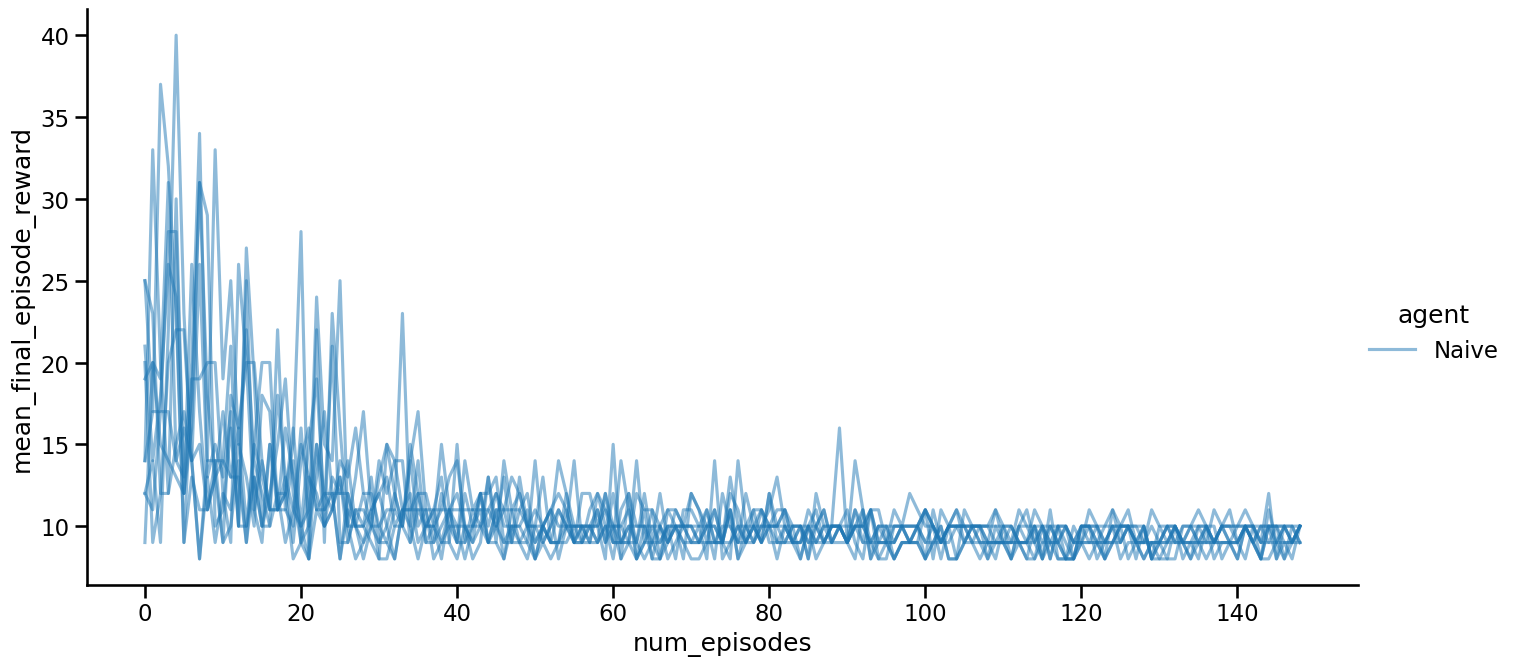

In [147]:
g = sns.relplot(
    x="num_episodes",
    y="mean_final_episode_reward",
    kind="line",
    hue="agent",
    estimator=None,
    units="training_index",
    data=naive_trains_result_df,
    height=7,
    aspect=2,
    alpha=0.5,
)
plt.savefig(PLOTS_DIR / "lab6_dqn_naive_trains_result.png")

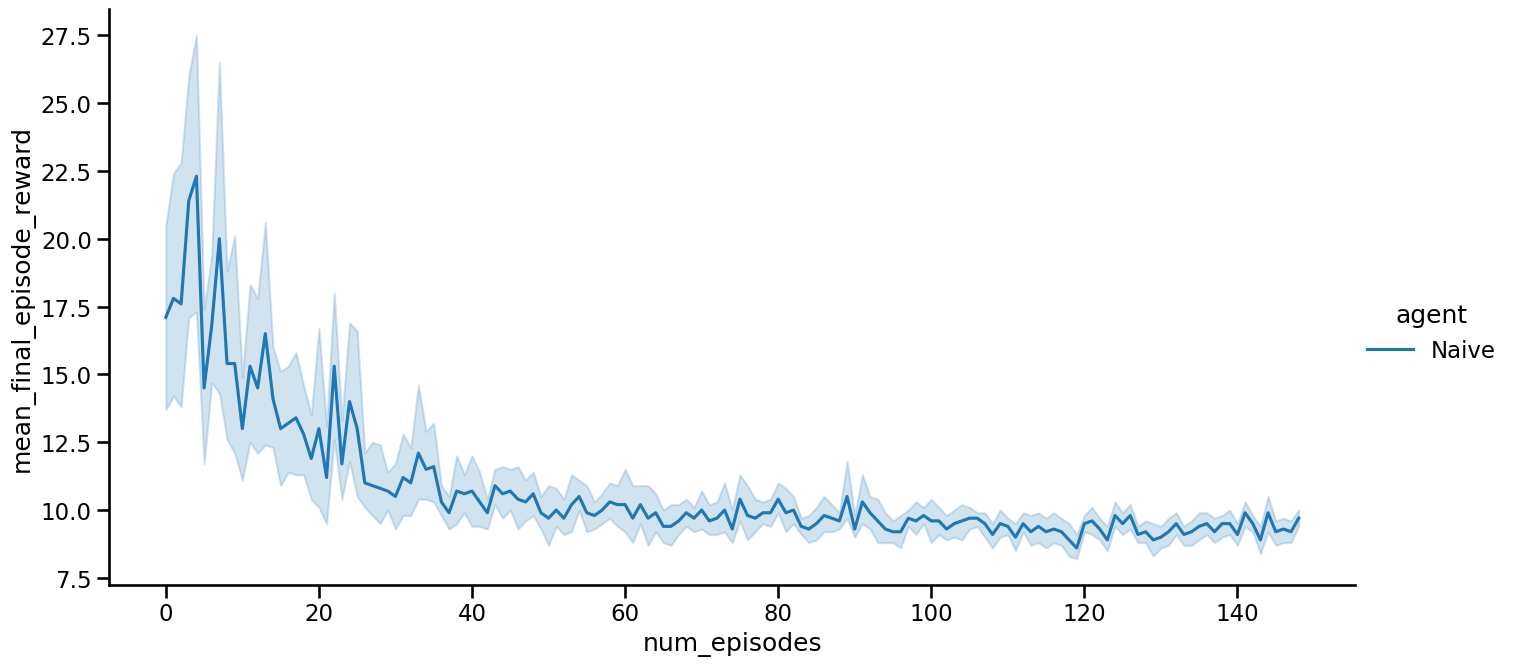

In [148]:
g = sns.relplot(
    x="num_episodes",
    y="mean_final_episode_reward",
    hue="agent",
    kind="line",
    data=naive_trains_result_df,
    height=7,
    aspect=2,
)
plt.savefig(PLOTS_DIR / "lab6_dqn_naive_trains_result_agg.png")

#### Test it

In [149]:
VIDEO_PREFIX_EX2_DQN_NAIVE_TRAINED = "lab6_ex2_dqn_naive_tained"

NUM_EPISODES = 3

file_path_list = [
    FIGS_DIR / f"{VIDEO_PREFIX_EX2_DQN_NAIVE_TRAINED}-episode-{episode_index}.mp4"
    for episode_index in range(NUM_EPISODES)
]

for file_path in file_path_list:
    file_path.unlink(missing_ok=True)

env = gym.make("CartPole-v1", render_mode="rgb_array")
env = gym.wrappers.RecordVideo(
    env,
    video_folder=str(FIGS_DIR),
    name_prefix=VIDEO_PREFIX_EX2_DQN_NAIVE_TRAINED,
    episode_trigger=lambda x: True,
)
env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=NUM_EPISODES)

test_q_network_agent(env, q_network, num_episode=NUM_EPISODES)

# print(f'Episode time taken: {env.time_queue}')
# print(f'Episode total rewards: {env.return_queue}')
# print(f'Episode lengths: {env.length_queue}')

env.close()

print("\nSelect the episode to play here 👇\n")

interact(video_selector, file_path=file_path_list)

Episode reward: 9.0
Episode reward: 10.0
Episode reward: 10.0

Select the episode to play here 👇



interactive(children=(Dropdown(description='file_path', options=(PosixPath('figs/outputs/lab6_ex2_dqn_naive_ta…

<function __main__.video_selector(file_path: List[pathlib.Path])>

#### Why It Doesn't Work: The Complexity of Deep Reinforcement Learning

Our initial deep value-based agent did not converge, primarily due to the three fundamental challenges of value-based deep reinforcement learning:

1. **Coverage**: Convergence to the optimal Q-function relies on comprehensive coverage of the state space. However, in the context of deep RL, the state space is often too large to be fully covered. In situations where not all states are sampled due to their vast number, the guarantee of convergence no longer holds.

2. **Correlation**: The probability of transitioning to the next state is highly influenced by the current state. This strong correlation can lead to local overfitting and the risk of becoming trapped in a local optimum: the neural network, which approximates the Q-function, may become overly specialized in a small portion of the action-state space and neglect the rest.

3. **Convergence**: The "targets" used as the truth to be achieved "move" during the learning process. For the same prediction (estimation of the value of a state-action pair, i.e., its Q-value), the loss of a given example changes during the learning process (due to *bootstrapping* a main concept of TD-Learning). In other words, DQN tries to minimize a moving target, a target that depends on the model we are learning and optimizing. This can lead to instability and make it difficult for the learning process to converge to an optimal policy.

In the following sections, we will explore strategies to address these challenges and improve the performance of our deep reinforcement learning agent.

### Exercise 3: Implement Deep Q-Networks v1 (DQN version 2013 with experience replay)

In 2013, DeepMind made a significant contribution to the field of reinforcement learning with the publication of the paper "Playing Atari with Deep Reinforcement Learning" by Volodymyr Mnih and al (https://arxiv.org/abs/1312.5602). This paper marked the introduction of the first version of Deep Q-Networks (DQN).

The paper's primary innovation was the development of a technique to decorrelate states in reinforcement learning. This technique, known as *experience replay*, leverages a *replay buffer* to store and sample experiences. The introduction of experience replay greatly enhanced the stability and efficiency of the learning process.

#### Experience replay

Experience replay is a key technique used in Deep Q-Networks (DQN) to address the issues of correlation.

In a typical reinforcement learning setup, an agent learns by interacting with the environment, receiving feedback in the form of rewards, and updating its policy based on this feedback. This process is inherently sequential and the successive states are highly correlated, which can lead to overfitting and instability in learning.

Experience replay addresses these issues by storing the agent's experiences, i.e., the tuples of (state, action, reward, next state), in a data structure known as a replay buffer. During the learning process, instead of learning from the most recent experience, the agent randomly samples a batch of experiences from the replay buffer. This random sampling breaks the correlation between successive experiences, leading to more stable and robust learning.

Also, by learning from past experiences, the agent can effectively learn from a fixed target, which mitigates the issue of learning from a moving target. This is because the experiences in the replay buffer remain fixed once they are stored, even though the agent's policy continues to evolve.

#### DQN v2013 Algorithm

Note: main differences with the previous algorithm are highlighted in red.

<b>Input</b>:<br>
	$\quad\quad$ none<br>
<b>Algorithm parameter</b>:<br>
	$\quad\quad$ discount factor $\gamma$<br>
	$\quad\quad$ step size $\alpha \in (0,1]$<br>
	$\quad\quad$ small $\epsilon > 0$<br>
	$\quad\quad$ capacity of the experience replay memory $\color{red}{M}$<br>
	$\quad\quad$ batch size $\color{red}{m}$<br><br>

<b>Initialize</b> replay memory $\color{red}{\mathcal{D}}$ to capacity $M$<br>
<b>Initialize</b> action-value function $\hat{Q}$ with random weights $\mathbf{\omega}$<br><br>

<b>FOR EACH</b> episode<br>
	$\quad$ $\mathbf{s} \leftarrow \text{env.reset}()$<br>
	$\quad$ <b>DO</b> <br>
		$\quad\quad$ $\mathbf{a} \leftarrow \epsilon\text{-greedy}(\mathbf{s}, \hat{Q}_{\mathbf{\omega}})$<br>
		$\quad\quad$ $r, \mathbf{s'} \leftarrow \text{env.step}(\mathbf{a})$<br>
		$\quad\quad$ $\color{red}{\text{Store transition } (\mathbf{s}, \mathbf{a}, r, \mathbf{s'}) \text{ in } \mathcal{D}}$<br>
		$\quad\quad$ $\color{red}{\text{IF } \mathcal{D} \text{ contains "enough" transitions}}$<br>
			$\quad\quad\quad$ $\color{red}{\text{Sample random batch of transitions } (\mathbf{s}_j, \mathbf{a}_j, r_j, \mathbf{s'}_j) \text{ from } \mathcal{D} \text{ with } j=1 \text{ to } m}$<br>
			$\quad\quad\quad$ $\color{red}{\text{For each } j}$, set $y_j \leftarrow
			\begin{cases}
			r_j & \text{for terminal } \mathbf{s'}_j\\
			r_j + \gamma \max_{\mathbf{a}^\star} \hat{Q}_{\mathbf{\omega}}(\mathbf{s'}_j)_{\mathbf{a}^\star} & \text{for non-terminal } \mathbf{s'}_j
			\end{cases}$<br>
			$\quad\quad\quad$ Perform a gradient descent step on $\left( y_j - \hat{Q}_{\mathbf{\omega}}(\mathbf{s}_j)_{\mathbf{a}_j} \right)^2$ with respect to the weights $\mathbf{\omega}$<br>
		$\quad\quad$ $\mathbf{s} \leftarrow \mathbf{s'}$ <br>
	$\quad$ <b>UNTIL</b> $\mathbf{s}$ is final<br><br>
<b>RETURN</b> $\mathbf{\omega}$ <br>


#### Implement the Replay Buffer

To incorporate experience replay into the provided naive deep value-based reinforcement learning agent definition, we need to introduce a memory buffer where experiences are stored, and then update the algorithm to sample a random batch of experiences from this buffer to update the weights.

In [150]:
class ReplayBuffer:
    """
    A Replay Buffer.

    Attributes
    ----------
    buffer : collections.deque
        A double-ended queue where the transitions are stored.

    Methods
    -------
    add(state: np.ndarray, action: np.int64, reward: float, next_state: np.ndarray, done: bool)
        Add a new transition to the buffer.
    sample(batch_size: int) -> Tuple[np.ndarray, float, float, np.ndarray, bool]
        Sample a batch of transitions from the buffer.
    __len__()
        Return the current size of the buffer.
    """

    def __init__(self, capacity: int):
        """
        Initializes a ReplayBuffer instance.

        Parameters
        ----------
        capacity : int
            The maximum number of transitions that can be stored in the buffer.
        """
        self.buffer: collections.deque = collections.deque(maxlen=capacity)

    def add(
        self,
        state: np.ndarray,
        action: np.int64,
        reward: float,
        next_state: np.ndarray,
        done: bool,
    ):
        """
        Add a new transition to the buffer.

        Parameters
        ----------
        state : np.ndarray
            The state vector of the added transition.
        action : np.int64
            The action of the added transition.
        reward : float
            The reward of the added transition.
        next_state : np.ndarray
            The next state vector of the added transition.
        done : bool
            The final state of the added transition.
        """
        self.buffer.append((state, action, reward, next_state, done))

    def sample(
        self, batch_size: int
    ) -> Tuple[np.ndarray, Tuple[int], Tuple[float], np.ndarray, Tuple[bool]]:
        """
        Sample a batch of transitions from the buffer.

        Parameters
        ----------
        batch_size : int
            The number of transitions to sample.

        Returns
        -------
        Tuple[np.ndarray, float, float, np.ndarray, bool]
            A batch of `batch_size` transitions.
        """
        # Here, `random.sample(self.buffer, batch_size)`
        # returns a list of tuples `(state, action, reward, next_state, done)`
        # where:
        # - `state`  and `next_state` are numpy arrays
        # - `action` and `reward` are floats
        # - `done` is a boolean
        #
        # `states, actions, rewards, next_states, dones = zip(*random.sample(self.buffer, batch_size))`
        # generates 5 tuples `state`, `action`, `reward`, `next_state` and `done`, each having `batch_size` elements.
        states, actions, rewards, next_states, dones = zip(*random.sample(self.buffer, batch_size))

        return np.array(states), actions, rewards, np.array(next_states), dones

    def __len__(self):
        """
        Return the current size of the buffer.

        Returns
        -------
        int
            The current size of the buffer.
        """
        return len(self.buffer)

#### Implement the training function

The training function of our initial deep value-based agent needs to be modified to incorporate the use of the replay buffer effectively.

1. **Store Experiences**: After the agent takes an action and receives a reward and the next state from the environment, store this experience in the replay buffer.

2. **Sample Experiences**: Instead of using the most recent experience to update the agent's policy, randomly sample a batch of experiences from the replay buffer.

3. **Compute Loss and Update Weights**: Use the sampled experiences to compute the loss and update the weights of the Q-Network.

4. **Handle Terminal States**: If the 'done' flag of an experience is True, indicating a terminal state, make sure to adjust the target Q-value to be just the received reward. This is because there are no future rewards possible after a terminal state.

##### Parctical tips

A key practical difference from the previous exercise is that we now train the Q-network on a (mini)batch of transitions rather than a single transition.  

To extract $\hat{Q}_{\mathbf{\omega}}(\mathbf{s}_j)_{\mathbf{a}_j}$ from the `q_network` output, it is essential to understand the following PyTorch concept:  

- **[torch.gather](https://pytorch.org/docs/stable/generated/torch.gather.html) (or [torch.Tensor.gather](https://pytorch.org/docs/stable/generated/torch.Tensor.gather.html))**: This function retrieves values along a specified axis using an index tensor, making it particularly useful for selecting Q-values corresponding to chosen actions.

**Task 3.1:** complete the `train_dqn1_agent` to use the replay buffer.

In [151]:
def train_dqn1_agent(
    env: gym.Env,
    q_network: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    loss_fn: Callable,
    epsilon_greedy: EpsilonGreedy,
    device: torch.device,
    lr_scheduler: torch.optim.lr_scheduler.LRScheduler,
    num_episodes: int,
    gamma: float,
    batch_size: int,
    replay_buffer: ReplayBuffer,
) -> List[float]:
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler.LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.
    batch_size : int
        The size of the batch to use for training.
    replay_buffer : ReplayBuffer
        The replay buffer storing the experiences with their priorities.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0.0

        for t in itertools.count():
            # Get action, next_state and reward

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            replay_buffer.add(state, action, float(reward), next_state, done)

            episode_reward += float(reward)

            # Update the q_network weights with a batch of experiences from the buffer

            if len(replay_buffer) > batch_size:
                batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = replay_buffer.sample(batch_size)

                # Convert to PyTorch tensors
                batch_states_tensor = torch.tensor(batch_states, dtype=torch.float32, device=device)
                batch_actions_tensor = torch.tensor(batch_actions, dtype=torch.long, device=device)
                batch_rewards_tensor = torch.tensor(batch_rewards, dtype=torch.float32, device=device)
                batch_next_states_tensor = torch.tensor(batch_next_states, dtype=torch.float32, device=device)
                batch_dones_tensor = torch.tensor(batch_dones, dtype=torch.float32, device=device)

                # Compute the target Q values for the batch
                with torch.no_grad():
                    next_state_q_values = q_network(batch_next_states_tensor)
                    best_next_actions = next_state_q_values.max(1)[0]
                    targets = batch_rewards_tensor + gamma * best_next_actions * (1 - batch_dones_tensor)

                current_q_values = q_network(batch_states_tensor).gather(1, batch_actions_tensor.unsqueeze(1)).squeeze(1)
                loss = loss_fn(current_q_values, targets)

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                lr_scheduler.step()

            if done:
                break

            state = next_state

        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

#### Train it

In [152]:
env = gym.make("CartPole-v1")

NUMBER_OF_TRAININGS = DEFAULT_NUMBER_OF_TRAININGS  # Change the default (global) value here if you want a specific number of trainings for this exercise
dqn1_trains_result_list: List[List[Union[int, float]]] = [[], [], []]

for train_index in range(NUMBER_OF_TRAININGS):
    # Instantiate required objects
    
    q_network = QNetwork(cartpole_observation_dim, cartpole_num_actions, nn_l1=128, nn_l2=128).to(device)
    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    # lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(
        epsilon_start=0.82,
        epsilon_min=0.013,
        epsilon_decay=0.9675,
        env=env,
        q_network=q_network,
    )

    replay_buffer = ReplayBuffer(2000)

    # Train the q-network

    episode_reward_list = train_dqn1_agent(
        env,
        q_network,
        optimizer,
        loss_fn,
        epsilon_greedy,
        device,
        lr_scheduler,
        num_episodes=150,
        gamma=0.9,
        batch_size=128,
        replay_buffer=replay_buffer,
    )
    dqn1_trains_result_list[0].extend(range(len(episode_reward_list)))
    dqn1_trains_result_list[1].extend(episode_reward_list)
    dqn1_trains_result_list[2].extend([train_index for _ in episode_reward_list])

dqn1_trains_result_df = pd.DataFrame(
    np.array(dqn1_trains_result_list).T,
    columns=["num_episodes", "mean_final_episode_reward", "training_index"],
)
dqn1_trains_result_df["agent"] = "DQN 2013"

# Save the action-value estimation function

torch.save(q_network, MODELS_DIR / "lab6_dqn1_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

#### Plot results

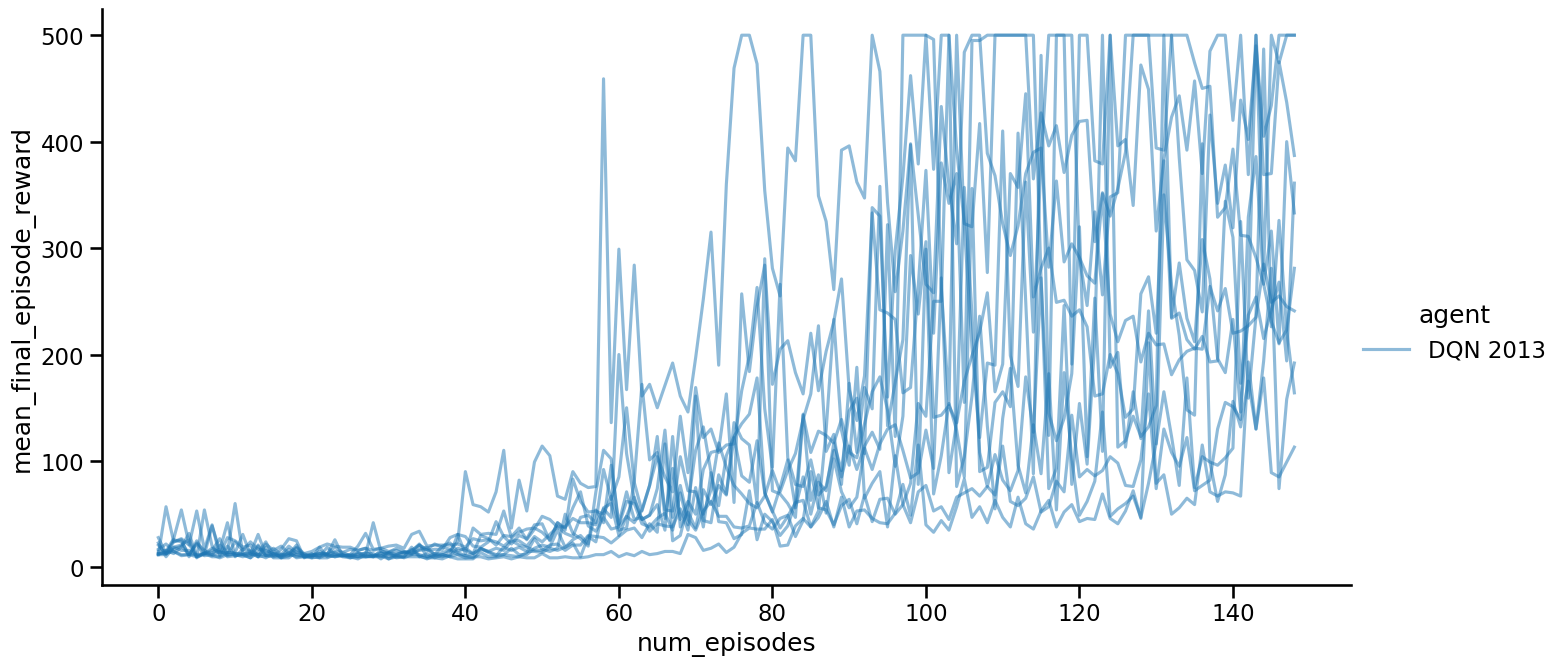

In [153]:
g = sns.relplot(
    x="num_episodes",
    y="mean_final_episode_reward",
    kind="line",
    hue="agent",
    estimator=None,
    units="training_index",
    data=dqn1_trains_result_df,
    height=7,
    aspect=2,
    alpha=0.5,
)
plt.savefig(PLOTS_DIR / "lab6_dqn1_trains_result.png")

In [154]:
# g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=dqn1_trains_result_df, height=7, aspect=2)

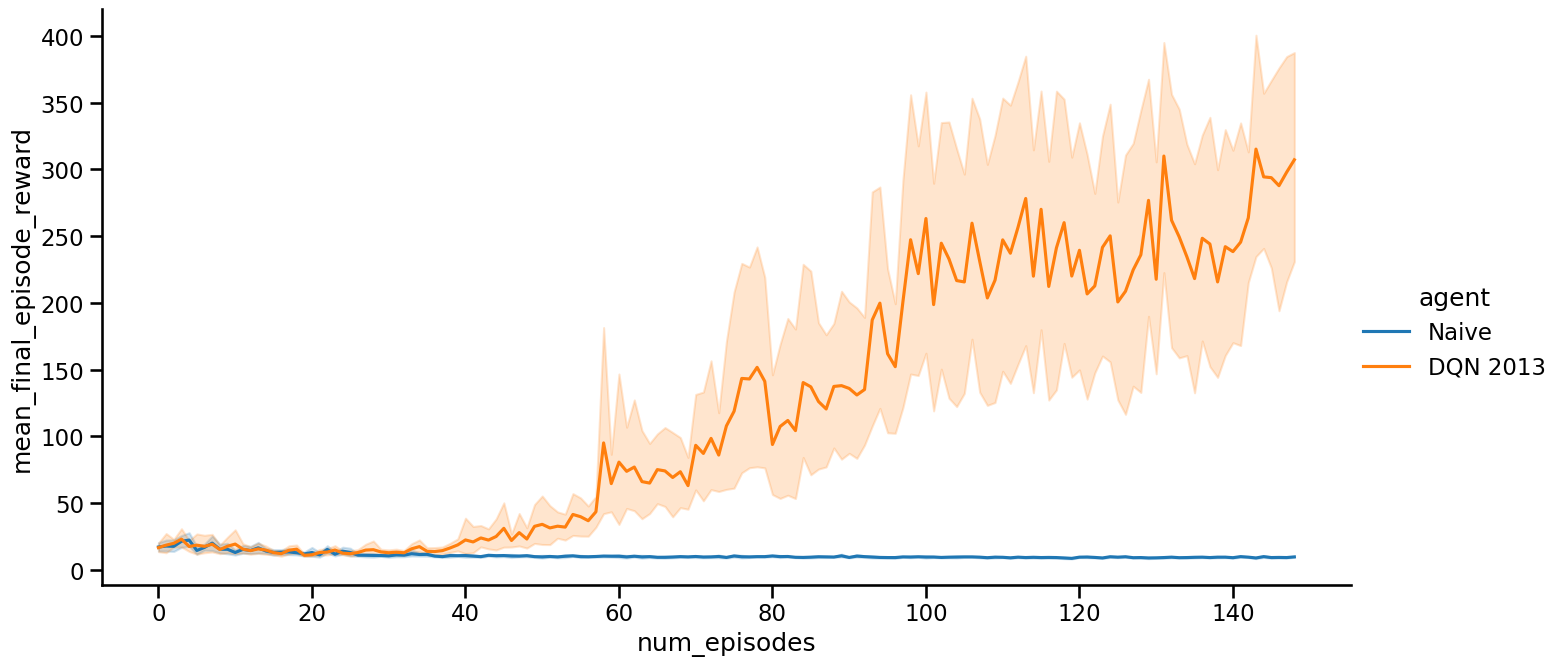

In [155]:
all_trains_result_df = pd.concat([naive_trains_result_df, dqn1_trains_result_df])
g = sns.relplot(
    x="num_episodes",
    y="mean_final_episode_reward",
    kind="line",
    hue="agent",
    data=all_trains_result_df,
    height=7,
    aspect=2,
)
plt.savefig(PLOTS_DIR / "lab6_dqn1_trains_result_agg.png")

#### Test it

In [156]:
VIDEO_PREFIX_EX3_DQN1_TRAINED = "lab6_ex3_dqn1_tained"

NUM_EPISODES = 3

file_path_list = [
    FIGS_DIR / f"{VIDEO_PREFIX_EX3_DQN1_TRAINED}-episode-{episode_index}.mp4"
    for episode_index in range(NUM_EPISODES)
]

for file_path in file_path_list:
    file_path.unlink(missing_ok=True)

env = gym.make("CartPole-v1", render_mode="rgb_array")
env = gym.wrappers.RecordVideo(
    env,
    video_folder=str(FIGS_DIR),
    name_prefix=VIDEO_PREFIX_EX3_DQN1_TRAINED,
    episode_trigger=lambda x: True,
)
env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=NUM_EPISODES)

test_q_network_agent(env, q_network, num_episode=NUM_EPISODES)

# print(f'Episode time taken: {env.time_queue}')
# print(f'Episode total rewards: {env.return_queue}')
# print(f'Episode lengths: {env.length_queue}')

env.close()

print("\nSelect the episode to play here 👇\n")

interact(video_selector, file_path=file_path_list)

Episode reward: 224.0
Episode reward: 214.0
Episode reward: 292.0

Select the episode to play here 👇



interactive(children=(Dropdown(description='file_path', options=(PosixPath('figs/outputs/lab6_ex3_dqn1_tained-…

<function __main__.video_selector(file_path: List[pathlib.Path])>

#### Score

In [157]:
score_ex3 = dqn1_trains_result_df[["num_episodes", "mean_final_episode_reward"]].groupby("num_episodes").mean().max()
score_ex3

mean_final_episode_reward    315.2
dtype: float64

### Exercise 4: Implement Deep Q-Networks v2 (DQN version 2015) with *infrequent weight updates*

In 2015, DeepMind further advanced the field of reinforcement learning with the publication of the paper "Human-level control through deep reinforcement learning" by Volodymyr Mnih and colleagues (https://www.nature.com/articles/nature14236). This work introduced the second version of Deep Q-Networks (DQN).

<img src="https://raw.githubusercontent.com/jeremiedecock/polytechnique-csc-52081-ep-2025-students/main/assets/lab6_dqn_nature_journal.jpg" width="200px" />

The key contribution of this paper was the introduction of a method to stabilize the learning process by infrequently updating the target weights. This technique, known as *infrequent updates of target weights*, significantly improved the stability of the learning process.

#### Infrequent weight updates

Infrequent weight updates, also known as the use of a target network, is a technique used in Deep Q-Networks (DQN) to address the issue of learning from a moving target.

In a typical DQN setup, there are two neural networks: the Q-network and the target network. The Q-network is used to predict the Q-values and is updated at every time step. The target network is used to compute the target Q-values for the update, and its weights are updated less frequently, typically every few thousand steps, by copying the weights from the Q-network.

The idea behind infrequent weight updates is to stabilize the learning process by keeping the target Q-values fixed for a number of steps. This mitigates the issue of learning from a moving target, as the target Q-values remain fixed between updates.

Without infrequent weight updates, both the predicted and target Q-values would change at every step, which could lead to oscillations and divergence in the learning process. By introducing a delay between updates of the target Q-values, the risk of such oscillations is reduced.

#### DQN v2015 Algorithm

Note: main differences with the previous algorithm are highlighted in red.

<b>Input</b>:<br>
	$\quad\quad$ none<br>
<b>Algorithm parameter</b>:<br>
	$\quad\quad$ discount factor $\gamma$<br>
	$\quad\quad$ step size $\alpha \in (0,1]$<br>
	$\quad\quad$ small $\epsilon > 0$<br>
	$\quad\quad$ capacity of the experience replay memory $M$<br>
	$\quad\quad$ batch size $m$<br>
	$\quad\quad$ target network update frequency $\color{red}{\tau}$<br><br>

<b>Initialize</b> replay memory $\mathcal{D}$ to capacity $M$<br>
<b>Initialize</b> action-value function $\hat{Q}_{\mathbf{\omega_1}}$ with random weights $\mathbf{\omega_1}$<br>
<b>Initialize</b> target action-value function $\hat{Q}_{\mathbf{\omega_2}}$ with weights $\color{red}{\mathbf{\omega_2} = \mathbf{\omega_1}}$<br><br>

<b>FOR EACH</b> episode<br>
	$\quad$ $\mathbf{s} \leftarrow \text{env.reset}()$<br>
	$\quad$ <b>DO</b> <br>
		$\quad\quad$ $\mathbf{a} \leftarrow \epsilon\text{-greedy}(\mathbf{s}, \hat{Q}_{\mathbf{\omega_1}})$<br>
		$\quad\quad$ $r, \mathbf{s'} \leftarrow \text{env.step}(\mathbf{a})$<br>
		$\quad\quad$ Store transition $(\mathbf{s}, \mathbf{a}, r, \mathbf{s'})$ in $\mathcal{D}$<br>
		$\quad\quad$ If $\mathcal{D}$ contains "enough" transitions<br>
			$\quad\quad\quad$ Sample random batch of transitions $(\mathbf{s}_j, \mathbf{a}_j, r_j, \mathbf{s'}_j)$ from $\mathcal{D}$ with $j=1$ to $m$<br>
			$\quad\quad\quad$ For each $j$, set $y_j =
			\begin{cases}
			r_j & \text{for terminal } \mathbf{s'}_j\\
			r_j + \gamma \max_{\mathbf{a}^\star} \hat{Q}_{\mathbf{\omega_{\color{red}{2}}}} (\mathbf{s'}_j)_{\mathbf{a}^\star} & \text{for non-terminal } \mathbf{s'}_j
			\end{cases}$<br>
			$\quad\quad\quad$ Perform a gradient descent step on $\left( y_j - \hat{Q}_{\mathbf{\omega_1}}(\mathbf{s}_j)_{\mathbf{a}_j} \right)^2$ with respect to the weights $\mathbf{\omega_1}$<br>
			$\quad\quad\quad$ Every $\color{red}{\tau}$ steps reset $\hat{Q}_{\mathbf{\omega_2}}$ to $\hat{Q}_{\mathbf{\omega_1}}$, i.e., set $\color{red}{\mathbf{\omega_2} \leftarrow \mathbf{\omega_1}}$<br>
		$\quad\quad$ $\mathbf{s} \leftarrow \mathbf{s'}$ <br>
	$\quad$ <b>UNTIL</b> $\mathbf{s}$ is final<br><br>
<b>RETURN</b> $\mathbf{\omega_1}$ <br>


#### Implement the training function

To incorporate the use of infrequent weight updates in the training function, you would need to make the following modifications:

1. **Update the Target Network Infrequently**: Instead of updating the weights of the target network at every time step, update them less frequently, for example, every few thousand steps. The weights of the target network are updated by copying the weights from the Q-network.

2. **Compute Target Q-values with the Target Network**: When computing the target Q-values for the update, use the target network instead of the Q-network. This ensures that the target Q-values remain fixed between updates, which stabilizes the learning process.

##### Parctical tips

To complete this exercise, you need to be familiar with the following PyTorch concepts.

**Copying the weights and biases from one neural network to another**

To transfer the parameters from `model1` to `model2`, use the following command:

```python
model2.load_state_dict(model1.state_dict())
```

**Task 4.1:** complete the `train_dqn2_agent` to apply infrequent weight updates.

In [158]:
def train_dqn2_agent(
    env: gym.Env,
    q_network: torch.nn.Module,
    target_q_network: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    loss_fn: Callable,
    epsilon_greedy: EpsilonGreedy,
    device: torch.device,
    lr_scheduler: torch.optim.lr_scheduler.LRScheduler,
    num_episodes: int,
    gamma: float,
    batch_size: int,
    replay_buffer: ReplayBuffer,
    target_q_network_sync_period: int,
) -> List[float]:
    """
    Train the Q-network on the given environment.

    Parameters
    ----------
    env : gym.Env
        The environment to train on.
    q_network : torch.nn.Module
        The Q-network to train.
    target_q_network : torch.nn.Module
        The target Q-network to use for estimating the target Q-values.
    optimizer : torch.optim.Optimizer
        The optimizer to use for training.
    loss_fn : callable
        The loss function to use for training.
    epsilon_greedy : EpsilonGreedy
        The epsilon-greedy policy to use for action selection.
    device : torch.device
        The device to use for PyTorch computations.
    lr_scheduler : torch.optim.lr_scheduler.LRScheduler
        The learning rate scheduler to adjust the learning rate during training.
    num_episodes : int
        The number of episodes to train for.
    gamma : float
        The discount factor for future rewards.
    batch_size : int
        The size of the batch to use for training.
    replay_buffer : ReplayBuffer
        The replay buffer storing the experiences with their priorities.
    target_q_network_sync_period : int
        The number of episodes after which the target Q-network should be updated with the weights of the Q-network.

    Returns
    -------
    List[float]
        A list of cumulated rewards per episode.
    """
    iteration = 0
    episode_reward_list = []

    for episode_index in tqdm(range(1, num_episodes)):
        state, info = env.reset()
        episode_reward = 0.0

        for t in itertools.count():
            # Get action, next_state and reward

            action = epsilon_greedy(state)

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            replay_buffer.add(state, action, float(reward), next_state, done)

            episode_reward += float(reward)

            # Update the q_network weights with a batch of experiences from the buffer

            if len(replay_buffer) > batch_size:
                batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = replay_buffer.sample(batch_size)

                # Convert to PyTorch tensors
                batch_states_tensor = torch.tensor(batch_states, dtype=torch.float32, device=device)
                batch_actions_tensor = torch.tensor(batch_actions, dtype=torch.long, device=device)
                batch_rewards_tensor = torch.tensor(batch_rewards, dtype=torch.float32, device=device)
                batch_next_states_tensor = torch.tensor(batch_next_states, dtype=torch.float32, device=device)
                batch_dones_tensor = torch.tensor(batch_dones, dtype=torch.float32, device=device)

                # Compute the target Q values for the batch
                with torch.no_grad():
                    # Compute the Q values for the next states using the target Q-network
                    next_state_q_values = target_q_network(batch_next_states_tensor)
                    best_action_indices = torch.argmax(next_state_q_values, dim=1)
                    best_next_q_values = next_state_q_values.gather(1, best_action_indices.unsqueeze(-1)).squeeze(-1)

                    # Compute the target Q values
                    targets = batch_rewards_tensor + gamma * best_next_q_values * (1 - batch_dones_tensor)

                # Compute the Q values for the current states using the Q-network
                current_q_values = q_network(batch_states_tensor).gather(1, batch_actions_tensor.unsqueeze(-1)).squeeze(-1)

                # Compute loss
                loss = loss_fn(current_q_values, targets)

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                lr_scheduler.step()

            # Update the target q-network weights

            # Every `target_q_network_sync_period` episodes, update the target Q-network with the weights of the Q-network
            if iteration % target_q_network_sync_period == 0:
                target_q_network.load_state_dict(q_network.state_dict())

            iteration += 1

            if done:
                break

            state = next_state

        episode_reward_list.append(episode_reward)
        epsilon_greedy.decay_epsilon()

    return episode_reward_list

#### Train it

In order to test this new implementation, we needs de adapt the following cell to instantiate and initialize the two neural networks.

**Task 4.2:** complete the following cell to make the two Q-Networks. Initialize a target network that has the same architecture as the Q-network. The weights of the target network are initially copied from the Q-network.

In [159]:
env = gym.make("CartPole-v1")

NUMBER_OF_TRAININGS = DEFAULT_NUMBER_OF_TRAININGS  # Change the default (global) value here if you want a specific number of trainings for this exercise
dqn2_trains_result_list: List[List[Union[int, float]]] = [[], [], []]

for train_index in range(NUMBER_OF_TRAININGS):
    # Instantiate required objects

    q_network = QNetwork(cartpole_observation_dim, cartpole_num_actions, nn_l1=128, nn_l2=128).to(device)
    target_q_network = QNetwork(cartpole_observation_dim, cartpole_num_actions, nn_l1=128, nn_l2=128).to(device)
    target_q_network.load_state_dict(q_network.state_dict())

    optimizer = torch.optim.AdamW(q_network.parameters(), lr=0.004, amsgrad=True)
    # lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
    lr_scheduler = MinimumExponentialLR(optimizer, lr_decay=0.97, min_lr=0.0001)
    loss_fn = torch.nn.MSELoss()

    epsilon_greedy = EpsilonGreedy(
        epsilon_start=0.82,
        epsilon_min=0.013,
        epsilon_decay=0.9675,
        env=env,
        q_network=q_network,
    )

    replay_buffer = ReplayBuffer(2000)

    # Train the q-network

    episode_reward_list = train_dqn2_agent(
        env,
        q_network,
        target_q_network,
        optimizer,
        loss_fn,
        epsilon_greedy,
        device,
        lr_scheduler,
        num_episodes=150,
        gamma=0.9,
        batch_size=128,
        replay_buffer=replay_buffer,
        target_q_network_sync_period=30,
    )
    dqn2_trains_result_list[0].extend(range(len(episode_reward_list)))
    dqn2_trains_result_list[1].extend(episode_reward_list)
    dqn2_trains_result_list[2].extend([train_index for _ in episode_reward_list])

dqn2_trains_result_df = pd.DataFrame(
    np.array(dqn2_trains_result_list).T,
    columns=["num_episodes", "mean_final_episode_reward", "training_index"],
)
dqn2_trains_result_df["agent"] = "DQN 2015"

# Save the action-value estimation function

torch.save(q_network, MODELS_DIR / "lab6_dqn2_q_network.pth")

env.close()

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

#### Plot results

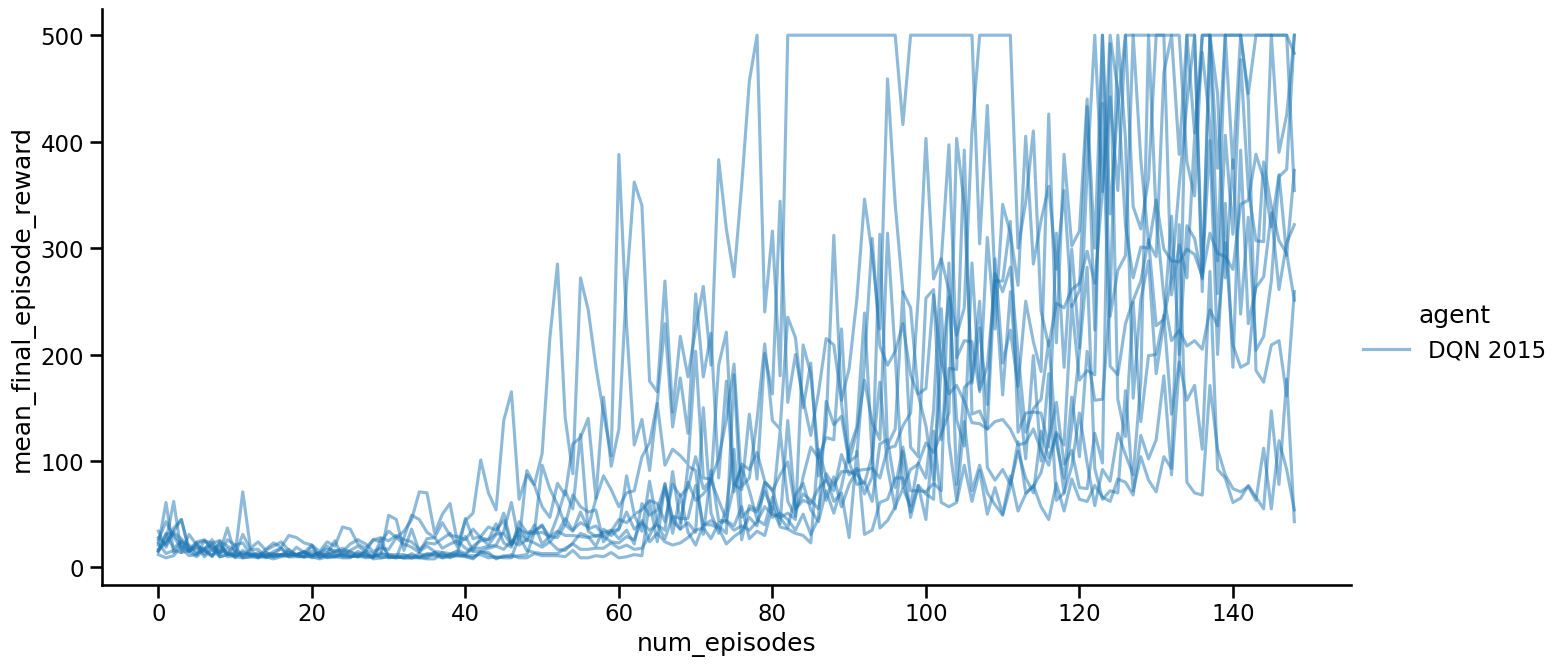

In [160]:
g = sns.relplot(
    x="num_episodes",
    y="mean_final_episode_reward",
    kind="line",
    hue="agent",
    estimator=None,
    units="training_index",
    data=dqn2_trains_result_df,
    height=7,
    aspect=2,
    alpha=0.5,
)
plt.savefig(PLOTS_DIR / "lab6_dqn2_trains_result.png")

In [161]:
# g = sns.relplot(x="num_episodes", y="mean_final_episode_reward", kind="line", hue="agent", data=dqn2_trains_result_df, height=7, aspect=2)

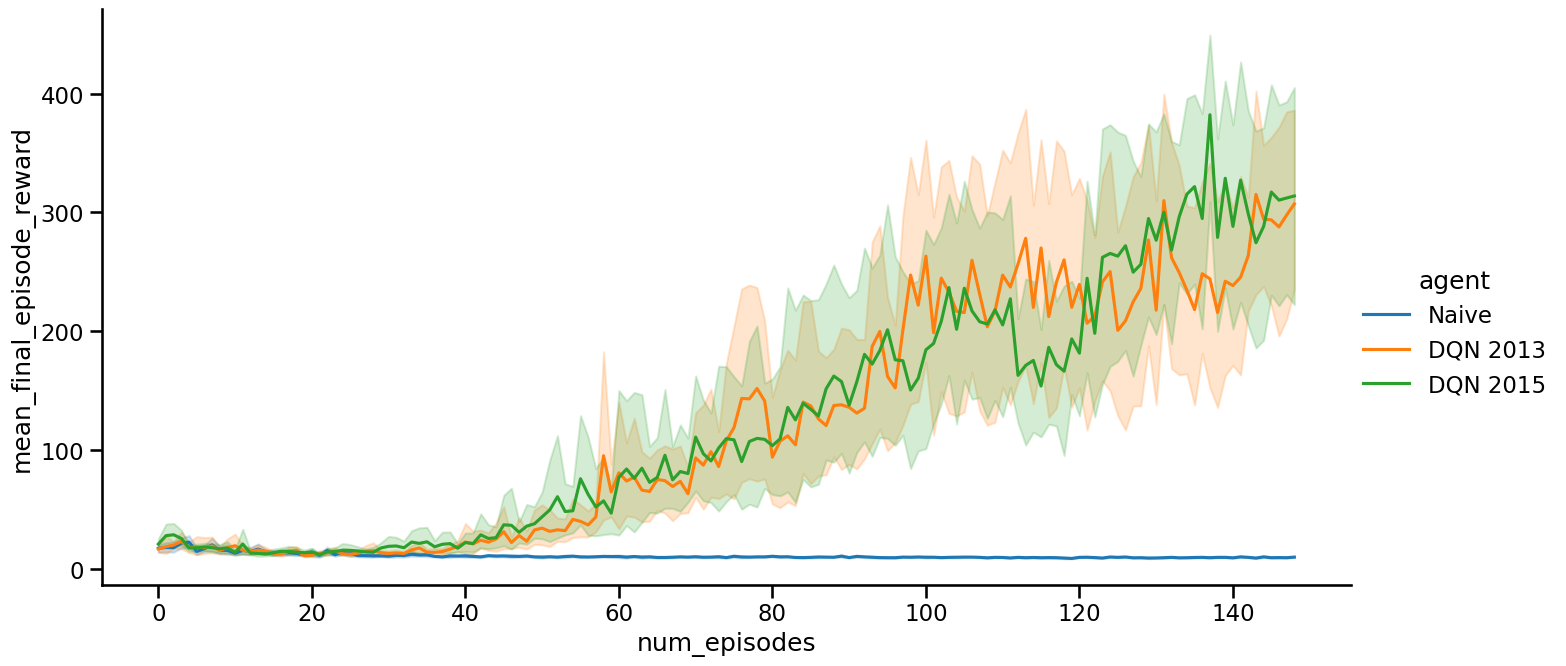

In [162]:
all_trains_result_df = pd.concat(
    [naive_trains_result_df, dqn1_trains_result_df, dqn2_trains_result_df]
)
g = sns.relplot(
    x="num_episodes",
    y="mean_final_episode_reward",
    kind="line",
    hue="agent",
    data=all_trains_result_df,
    height=7,
    aspect=2,
)
plt.savefig(PLOTS_DIR / "lab6_dqn2_trains_result_agg.png")

#### Test it

In [163]:
VIDEO_PREFIX_EX4_DQN2_TRAINED = "lab6_ex4_dqn2_tained"

NUM_EPISODES = 3

file_path_list = [
    FIGS_DIR / f"{VIDEO_PREFIX_EX4_DQN2_TRAINED}-episode-{episode_index}.mp4"
    for episode_index in range(NUM_EPISODES)
]

for file_path in file_path_list:
    file_path.unlink(missing_ok=True)

env = gym.make("CartPole-v1", render_mode="rgb_array")
env = gym.wrappers.RecordVideo(
    env,
    video_folder=str(FIGS_DIR),
    name_prefix=VIDEO_PREFIX_EX4_DQN2_TRAINED,
    episode_trigger=lambda x: True,
)
env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=NUM_EPISODES)

test_q_network_agent(env, q_network, num_episode=NUM_EPISODES)

# print(f'Episode time taken: {env.time_queue}')
# print(f'Episode total rewards: {env.return_queue}')
# print(f'Episode lengths: {env.length_queue}')

env.close()

print("\nSelect the episode to play here 👇\n")

interact(video_selector, file_path=file_path_list)

Episode reward: 413.0
Episode reward: 457.0
Episode reward: 387.0

Select the episode to play here 👇



interactive(children=(Dropdown(description='file_path', options=(PosixPath('figs/outputs/lab6_ex4_dqn2_tained-…

<function __main__.video_selector(file_path: List[pathlib.Path])>

#### Score

In [164]:
score_ex4 = dqn2_trains_result_df[["num_episodes", "mean_final_episode_reward"]].groupby("num_episodes").mean().max()
score_ex4

mean_final_episode_reward    382.3
dtype: float64

## Bonus 1: Deep policy-based reinforcement learning with Monte Carlo Policy Gradient (REINFORCE)

In the previous part, we explored DQN, a value-based method that can be used to solve Reinforcement Learning problems having large state spaces.
Now, we will solve the CartPole environment using a policy gradient method which directly searchs in a family of parameterized policies $\pi_\theta$ for the optimal policy.

### The Policy Gradient theorem

We will solve the CartPole environment using a policy gradient method which directly searchs in a family of parameterized policies $\pi_\theta$ for the optimal policy.

This method performs gradient ascent in the policy space so that the total return is maximized.
We will restrict our work to episodic tasks, *i.e.* tasks that have a starting states and last for a finite and fixed number of steps $T$, called horizon.

More formally, we define an optimization criterion that we want to maximize:

$$J(\theta) = \mathbb{E}_{\pi_\theta}\left[\sum_{t=1}^T r(s_t,a_t)\right],$$

where $\mathbb{E}_{\pi_\theta}$ means $a \sim \pi_\theta(\cdot|s)$ and $T$ is the horizon of the episode.
In other words, we want to maximize the value of the starting state: $V^{\pi_\theta}(s)$.
The policy gradient theorem tells us that:

$$
\nabla_\theta J(\theta) = \nabla_\theta V^{\pi_\theta}(s) = \mathbb{E}_{\pi_\theta} \left[\nabla_\theta \log \pi_\theta (a|s) ~ Q^{\pi_\theta}(s,a) \right],
$$

where the $Q$-function is defined as:

$$Q^{\pi_\theta}(a|s) = \mathbb{E}^{\pi_\theta} \left[\sum_{t=1}^T r(s_t,a_t)|s=s_1, a=a_1\right].$$

The policy gradient theorem is particularly effective because it allows gradient computation without needing to understand the system's dynamics, as long as the $Q$-function for the current policy is computable. By simply applying the policy and observing the one-step transitions, sufficient information is gathered. Implementing a stochastic gradient ascent and substituting $Q^{\pi_\theta}(s_t,a_t)$ with a Monte Carlo estimate $R_t = \sum_{t'=t}^T r(s_{t'},a_{t'})$ for a single trajectory, we derive the REINFORCE algorithm.

The REINFORCE algorithm, introduced by Williams in 1992, is a Monte Carlo policy gradient method. It updates the policy in the direction that maximizes rewards, using full-episode returns as an unbiased estimate of the gradient. Each step involves generating an episode using the current policy, computing the gradient estimate, and updating the policy parameters. This algorithm is simple yet powerful, and it's particularly effective in environments where the policy gradient is noisy or the dynamics are complex.

For further reading and a deeper understanding, refer to Williams' seminal paper (https://link.springer.com/article/10.1007/BF00992696) and the comprehensive text on reinforcement learning by Richard S. Sutton and Andrew G. Barto: "Reinforcement Learning: An Introduction", chap.13 (http://incompleteideas.net/book/RLbook2020.pdf).

Here is the REINFORCE algorithm.

### Monte Carlo policy gradient (REINFORCE)

<b>REQUIRE</b> <br>
$\quad$ A differentiable policy $\pi_{\boldsymbol{\theta}}$ <br>
$\quad$ A learning rate $\alpha \in \mathbb{R}^+$ <br>
<b>INITIALIZATION</b> <br>
$\quad$ Initialize parameters $\boldsymbol{\theta} \in \mathbb{R}^d$ <br>
<br>
<b>FOR EACH</b> episode <br>
$\quad$ Generate full trace $\tau = \{ \boldsymbol{s}_0, \boldsymbol{a}_0, r_1, \boldsymbol{s}_1, \boldsymbol{a}_1, \dots, r_T, \boldsymbol{s}_T \}$ following $\pi_{\boldsymbol{\theta}}$ <br>
$\quad$ <b>FOR</b> $~ t=0,\dots,T-1$ <br>
$\quad\quad$ $G \leftarrow \sum_{k=t}^{T-1} r_k$ <br>
$\quad\quad$ $\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} + \alpha ~ \underbrace{G ~ \nabla_{\boldsymbol{\theta}} \ln \pi_{\boldsymbol{\theta}}(\boldsymbol{a}_t|\boldsymbol{s}_t)}_{\nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta})}$ <br>
<br>
<b>RETURN</b> $\boldsymbol{\theta}$

### Exercise 5: REINFORCE for discrete action spaces (Cartpole)

#### Policy Implementation

We will implement a stochastic policy to control the cart using a simple one-layer neural network. Given the simplicity of the problem, a single layer will suffice. We will not incorporate a bias term in this layer.

This neural network will output the probabilities of each possible action (in this case, there are only two actions: "push left" or "push right") given the input vector $s$ (the 4-dimensional state vector).

**Task 5.1**: Implement the `PolicyNetwork`  defined as follow.

The network takes an input tensor representing the state of the environment and outputs a tensor of action probabilities.
The network has the following components:

- `layer1`: This is a linear (fully connected) layer that takes `n_observations` as input and outputs `n_actions`. It does not include a bias term.

- `forward` method: This method defines the forward pass of the network. It takes a state tensor as input and returns a tensor of action probabilities. It first applies the linear layer to the input state tensor to get the logits (the raw, unnormalized scores for each action), and then applies the softmax function to the logits to get the action probabilities. The softmax function ensures that the action probabilities are positive and sum to 1, so they can be interpreted as probabilities.

This network is quite simple and may not perform well on complex tasks with large state or action spaces. However, it can be a good starting point for simple reinforcement learning tasks, and can be easily extended with more layers or different types of layers (such as convolutional layers for image inputs) to handle more complex tasks.

In [ ]:
USE_IMPROVE_NETWORK = False

In [165]:
class PolicyNetwork(torch.nn.Module):
    """
    A neural network used as a policy for the REINFORCE algorithm.

    Attributes
    ----------
    layer1 : torch.nn.Linear
        A fully connected layer.

    Methods
    -------
    forward(state: torch.Tensor) -> torch.Tensor
        Define the forward pass of the PolicyNetwork.
    """

    def __init__(self, n_observations: int, n_actions: int):
        """
        Initialize a new instance of PolicyNetwork.

        Parameters
        ----------
        n_observations : int
            The size of the observation space.
        n_actions : int
            The size of the action space.
        """
        super(PolicyNetwork, self).__init__()

        # TODO...
        self.layer1 = torch.nn.Linear(n_observations, n_actions, bias=False)

    def forward(self, state_tensor: torch.Tensor) -> torch.Tensor:
        """
        Calculate the probability of each action for the given state.

        Parameters
        ----------
        state_tensor : torch.Tensor
            The input tensor (state).
            The shape of the tensor should be (N, dim),
            where N is the number of states vectors in the batch
            and dim is the dimension of state vectors.

        Returns
        -------
        torch.Tensor
            The output tensor (the probability of each action for the given state).
        """

        # TODO...
        logits = self.layer1(state_tensor)
        out = torch.nn.functional.softmax(logits, dim=-1)

        return out

In [166]:
class ImprovedPolicyNetwork(torch.nn.Module):
    """
    An improved neural network used as a policy for the REINFORCE algorithm.

    Attributes
    ----------
    layer1 : torch.nn.Linear
        A fully connected layer.
    layer2 : torch.nn.Linear
        A second fully connected layer.
    layer3 : torch.nn.Linear
        A third fully connected layer.
    dropout : torch.nn.Dropout
        A dropout layer for regularization.
    """

    def __init__(self, n_observations: int, n_actions: int, hidden_size: int = 128, dropout_rate: float = 0.5):
        """
        Initialize a new instance of ImprovedPolicyNetwork.

        Parameters
        ----------
        n_observations : int
            The size of the observation space.
        n_actions : int
            The size of the action space.
        hidden_size : int, optional
            The size of the hidden layers. Default is 128.
        dropout_rate : float, optional
            The dropout rate for regularization. Default is 0.5.
        """
        super(ImprovedPolicyNetwork, self).__init__()

        self.layer1 = torch.nn.Linear(n_observations, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.layer3 = torch.nn.Linear(hidden_size, n_actions)
        self.dropout = torch.nn.Dropout(dropout_rate)

    def forward(self, state_tensor: torch.Tensor) -> torch.Tensor:
        """
        Calculate the probability of each action for the given state.

        Parameters
        ----------
        state_tensor : torch.Tensor
            The input tensor (state).
            The shape of the tensor should be (N, dim),
            where N is the number of states vectors in the batch
            and dim is the dimension of state vectors.

        Returns
        -------
        torch.Tensor
            The output tensor (the probability of each action for the given state).
        """
        x = torch.nn.functional.relu(self.layer1(state_tensor))
        x = self.dropout(x)
        x = torch.nn.functional.relu(self.layer2(x))
        x = self.dropout(x)
        logits = self.layer3(x)
        out = torch.nn.functional.softmax(logits, dim=-1)

        return out

**Task 5.2**: Complete the `sample_discrete_action` function. This function is used to sample a discrete action based on a given state and a policy network. It first converts the state into a tensor and passes it through the policy network to get the parameters of the action probability distribution. Then, it creates a categorical distribution from these parameters and samples an action from this distribution. It also calculates the log probability of the sampled action according to the distribution. The function returns the sampled action and its log probability.

In [167]:
def sample_discrete_action(
    policy_nn: PolicyNetwork, state: np.ndarray
) -> Tuple[int, torch.Tensor]:
    """
    Sample a discrete action based on the given state and policy network.

    This function takes a state and a policy network, and returns a sampled action and its log probability.
    The action is sampled from a categorical distribution defined by the output of the policy network.

    Parameters
    ----------
    policy_nn : PolicyNetwork
        The policy network that defines the probability distribution of the actions.
    state : np.ndarray
        The state based on which an action needs to be sampled.

    Returns
    -------
    Tuple[int, torch.Tensor]
        The sampled action and its log probability.

    """

    # Convert the state into a tensor, specify its data type as float32, and send it to the device (CPU or GPU).
    state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)

    # Pass the state tensor through the policy network to get the parameters of the action probability distribution.
    actions_probability_distribution_params = policy_nn(state_tensor)

    # Create the categorical distribution used to sample an action from the parameters obtained from the policy network.
    actions_probability_distribution = torch.distributions.Categorical(actions_probability_distribution_params)

    # Sample an action from the categorical distribution.
    sampled_action_tensor = actions_probability_distribution.sample()

    # Convert the tensor containing the sampled action into a Python integer.
    sampled_action = sampled_action_tensor.item()

    # Calculate the log probability of the sampled action according to the categorical distribution.
    sampled_action_log_probability = actions_probability_distribution.log_prob(sampled_action_tensor)

    # Return the sampled action and its log probability.
    return sampled_action, sampled_action_log_probability

**Task 5.3**: Test the `sample_discrete_action` function on a random state using an untrained policy network.

In [ ]:
env = gym.make("CartPole-v1")

# policy_nn = TODO...

# state = TODO...
# theta = TODO...
# action, action_log_probability = TODO...

if USE_IMPROVE_NETWORK:
    policy_nn = ImprovedPolicyNetwork(cartpole_observation_dim, cartpole_num_actions).to(device)
else:
    policy_nn = PolicyNetwork(cartpole_observation_dim, cartpole_num_actions).to(device)

state, _ = env.reset()
theta = policy_nn.state_dict()
action, action_log_probability = sample_discrete_action(policy_nn, state)

print("state:", state)
print("theta:", theta)
print("sampled action:", action)
print("log probability of the sampled action:", action_log_probability)

env.close()

state: [-0.02461002 -0.03169563  0.01834226  0.00767273]
theta: OrderedDict([('layer1.weight', tensor([[-0.2100, -0.3046, -0.3419, -0.1870],
        [-0.0843, -0.4533, -0.2244, -0.2669],
        [ 0.1539,  0.3270, -0.4643, -0.4242],
        [ 0.0011,  0.1012,  0.2478,  0.4024],
        [ 0.4898, -0.0043, -0.1027,  0.1344],
        [ 0.1104,  0.3612, -0.3934, -0.4468],
        [ 0.2692, -0.4120, -0.0199,  0.3475],
        [ 0.2602,  0.1893, -0.1795, -0.2492],
        [ 0.4464,  0.4409,  0.2885,  0.2133],
        [-0.4730, -0.3217, -0.4054, -0.1900],
        [ 0.1939, -0.0031, -0.1809, -0.4823],
        [ 0.0727, -0.0908, -0.3167, -0.2981],
        [-0.0349, -0.3737, -0.2330, -0.0798],
        [ 0.1637,  0.2849,  0.3134,  0.0847],
        [-0.1506,  0.3887,  0.3978, -0.2980],
        [-0.2602,  0.0685,  0.1663,  0.3912],
        [ 0.3376, -0.1084, -0.0177, -0.0651],
        [ 0.2453,  0.2675,  0.4945,  0.2825],
        [-0.0761, -0.1050, -0.4454, -0.1175],
        [-0.1687,  0.1600, -0.0

#### Implement the sample_one_episode function

Remember that in the REINFORCE algorithm, we need to generate a complete trajectory, denoted as $\tau = \{ \boldsymbol{s}_0, \boldsymbol{a}_0, r_1, \boldsymbol{s}_1, \boldsymbol{a}_1, \dots, r_T, \boldsymbol{s}_T \}$. This trajectory includes the states, actions, and rewards at each time step, as outlined in the algorithm at the beginning of Part 1.

**Task 5.4**: Your task is to implement the `sample_one_episode` function. This function should play one episode using the given policy $\pi_\theta$ and return its rollouts. The function should adhere to a fixed horizon $T$, which represents the maximum number of steps in the episode.

In [169]:
def sample_one_episode(
    env: gym.Env, policy_nn: PolicyNetwork, max_episode_duration: int
) -> Tuple[List[np.ndarray], List[int], List[float], List[torch.Tensor]]:
    """
    Execute one episode within the `env` environment utilizing the policy defined by the `policy_nn` parameter.

    Parameters
    ----------
    env : gym.Env
        The environment to play in.
    policy_nn : PolicyNetwork
        The policy neural network.
    max_episode_duration : int
        The maximum duration of the episode.

    Returns
    -------
    Tuple[List[np.ndarray], List[int], List[float], List[torch.Tensor]]
        The states, actions, rewards, and log probability of action for each time step in the episode.
    """
    state_t, info = env.reset()

    episode_states = []
    episode_actions = []
    episode_log_prob_actions = []
    episode_rewards = []
    episode_states.append(state_t)

    for t in range(max_episode_duration):
        action_t, log_prob_action_t = sample_discrete_action(policy_nn, state_t)
        state_t, reward_t, terminated, truncated, info = env.step(action_t)

        # Sample a discrete action and its log probability from the policy network based on the current state
        # action_t, log_prob_action_t = TODO...

        # Execute the sampled action in the environment, which returns the new state, reward, and whether the episode has terminated or been truncated
        # state_t, reward_t, terminated, truncated, info = TODO...

        # Check if the episode is done, either due to termination (reaching a terminal state) or truncation (reaching a maximum number of steps)
        done = terminated or truncated

        # Append the new state, action, action log probability and reward to their respective lists

        episode_states.append(state_t)
        episode_actions.append(action_t)
        episode_log_prob_actions.append(log_prob_action_t)
        episode_rewards.append(float(reward_t))

        if done:
            break

    return episode_states, episode_actions, episode_rewards, episode_log_prob_actions

**Task 5.5:** Test this function on the untrained agent.

In [ ]:
VIDEO_PREFIX_EX5_REINFORCE_UNTRAINED = "lab6_ex5_reinforce_untained"

NUM_EPISODES = 3

file_path_list = [
    FIGS_DIR / f"{VIDEO_PREFIX_EX5_REINFORCE_UNTRAINED}-episode-{episode_index}.mp4"
    for episode_index in range(NUM_EPISODES)
]

for file_path in file_path_list:
    file_path.unlink(missing_ok=True)

env = gym.make("CartPole-v1", render_mode="rgb_array")
env = gym.wrappers.RecordVideo(
    env,
    video_folder=str(FIGS_DIR),
    name_prefix=VIDEO_PREFIX_EX5_REINFORCE_UNTRAINED,
    episode_trigger=lambda x: True,
)
env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=NUM_EPISODES)

for episode_index in range(NUM_EPISODES):
    if USE_IMPROVE_NETWORK:
        policy_nn = ImprovedPolicyNetwork(cartpole_observation_dim, cartpole_num_actions).to(device)
    else:
        policy_nn = PolicyNetwork(cartpole_observation_dim, cartpole_num_actions).to(device)
    episode_states, episode_actions, episode_rewards, episode_log_prob_actions = sample_one_episode(env, policy_nn, max_episode_duration=500)
    # policy_nn = TODO...
    # episode_states, episode_actions, episode_rewards, episode_log_prob_actions = TODO...

print(f"Episode time taken: {env.time_queue}")
print(f"Episode total rewards: {env.return_queue}")
print(f"Episode lengths: {env.length_queue}")

env.close()

print("\nSelect the episode to play here 👇\n")

interact(video_selector, file_path=file_path_list)

Episode time taken: deque([0.02442, 0.013783, 0.03998], maxlen=3)
Episode total rewards: deque([13.0, 9.0, 21.0], maxlen=3)
Episode lengths: deque([13, 9, 21], maxlen=3)

Select the episode to play here 👇



interactive(children=(Dropdown(description='file_path', options=(PosixPath('figs/outputs/lab6_ex5_reinforce_un…

<function __main__.video_selector(file_path: List[pathlib.Path])>

In [171]:
episode_states

[array([ 0.00428426, -0.03759538,  0.01873103,  0.00699315], dtype=float32),
 array([ 0.00353235,  0.15725301,  0.01887089, -0.27972156], dtype=float32),
 array([ 0.00667741,  0.35210076,  0.01327646, -0.56639344], dtype=float32),
 array([ 0.01371943,  0.15679508,  0.00194859, -0.2695576 ], dtype=float32),
 array([ 0.01685533,  0.3518892 , -0.00344256, -0.5616253 ], dtype=float32),
 array([ 0.02389312,  0.15681571, -0.01467506, -0.27002892], dtype=float32),
 array([ 0.02702943, -0.03809378, -0.02007564,  0.01798953], dtype=float32),
 array([ 0.02626755, -0.23292215, -0.01971585,  0.30427137], dtype=float32),
 array([ 0.02160911, -0.03752486, -0.01363042,  0.0054363 ], dtype=float32),
 array([ 0.02085861,  0.15778989, -0.0135217 , -0.29151583], dtype=float32),
 array([ 0.02401441, -0.03713668, -0.01935202, -0.00312797], dtype=float32),
 array([ 0.02327168,  0.15825738, -0.01941457, -0.30185333], dtype=float32),
 array([ 0.02643682,  0.3536506 , -0.02545164, -0.6005954 ], dtype=float32),

In [172]:
episode_actions

[1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]

In [173]:
episode_rewards

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

#### Implement a test function

**Task 5.6**: Implement the `avg_return_on_multiple_episodes` function that test the given policy $\pi_\theta$ on `num_episodes` episodes (for fixed horizon $T$) and returns the average reward on the `num_episodes` episodes.

The function `avg_return_on_multiple_episodes` is designed to play multiple episodes of a given environment using a specified policy neural network and calculate the average return. It takes as input the environment to play in, the policy neural network to use, the number of episodes to play, the maximum duration of an episode, and an optional parameter to decide whether to render the environment or not.
In each episode, it uses the `sample_one_episode` function to play the episode and collect the rewards. The function then returns the average of these cumulated rewards.

`avg_return_on_multiple_episodes` will be used for evaluating the performance of a policy over multiple episodes.

In [174]:
def avg_return_on_multiple_episodes(
    env: gym.Env,
    policy_nn: PolicyNetwork,
    num_test_episode: int,
    max_episode_duration: int,
) -> float:
    """
    Play multiple episodes of the environment and calculate the average return.

    Parameters
    ----------
    env : gym.Env
        The environment to play in.
    policy_nn : PolicyNetwork
        The policy neural network.
    num_test_episode : int
        The number of episodes to play.
    max_episode_duration : int
        The maximum duration of an episode.

    Returns
    -------
    float
        The average return.
    """

    # TODO...
    total_return = 0.0

    for _ in range(num_test_episode):
        _, _, episode_rewards, _ = sample_one_episode(env, policy_nn, max_episode_duration)
        total_return += sum(episode_rewards)

    average_return = total_return / num_test_episode

    return average_return

**Task 5.7:** Test this function on the untrained agent.

In [ ]:
env = gym.make("CartPole-v1")

# TODO...
if USE_IMPROVE_NETWORK:
    policy_nn = ImprovedPolicyNetwork(cartpole_observation_dim, cartpole_num_actions).to(device)
else:
    policy_nn = PolicyNetwork(cartpole_observation_dim, cartpole_num_actions).to(device)
average_return = avg_return_on_multiple_episodes(env, policy_nn, num_test_episode=10, max_episode_duration=500)
print(average_return)

env.close()

26.2


#### Implement the train function

**Task 5.8**: Implement the `train_reinforce_discrete` function, used to train a policy network using the REINFORCE algorithm in the given environment. This function takes as input the environment, the number of training episodes, the number of tests to perform per episode, the maximum duration of an episode, and the learning rate for the optimizer.

The function first initializes a policy network and an Adam optimizer. Then, for each training episode, it generates an episode using the current policy and calculates the return at each time step. It uses this return and the log probability of the action taken at that time step to compute the loss, which is the negative of the product of the return and the log probability. This loss is used to update the policy network parameters using gradient ascent.

After each training episode, the function tests the current policy by playing a number of test episodes and calculating the average return. This average return is added to a list for monitoring purposes.

The function returns the trained policy network and the list of average returns for each episode. This function encapsulates the main loop of the REINFORCE algorithm, including the policy update step. Please refer back to the algorithm outlined at the start of Part 3 for additional context, if necessary.

In [ ]:
def train_reinforce_discrete(
    env: gym.Env,
    num_train_episodes: int,
    num_test_per_episode: int,
    max_episode_duration: int,
    learning_rate: float,
) -> Tuple[PolicyNetwork, List[float]]:
    """
    Train a policy using the REINFORCE algorithm.

    Parameters
    ----------
    env : gym.Env
        The environment to train in.
    num_train_episodes : int
        The number of training episodes.
    num_test_per_episode : int
        The number of tests to perform per episode.
    max_episode_duration : int
        The maximum length of an episode, by default EPISODE_DURATION.
    learning_rate : float
        The initial step size.

    Returns
    -------
    Tuple[PolicyNetwork, List[float]]
        The final trained policy and the average returns for each episode.
    """
    episode_avg_return_list = []

    if USE_IMPROVE_NETWORK:
        policy_nn = ImprovedPolicyNetwork(cartpole_observation_dim, cartpole_num_actions).to(device)
    else:
        policy_nn = PolicyNetwork(cartpole_observation_dim, cartpole_num_actions).to(device)
    optimizer = torch.optim.Adam(policy_nn.parameters(), lr=learning_rate)

    for episode_index in tqdm(range(num_train_episodes)):
        # TODO...
        # Sample one episode
        episode_states, episode_actions, episode_rewards, episode_log_prob_actions = sample_one_episode(
            env, policy_nn, max_episode_duration
        )

        # Compute the return for each time step
        returns = []
        G = 0
        for reward in reversed(episode_rewards):
            G = reward + G
            returns.insert(0, G)

        # Normalize returns
        returns = torch.tensor(returns, dtype=torch.float32)
        returns = (returns - returns.mean()) / (returns.std() + 1e-9)

        # Compute the loss
        loss = 0
        for log_prob, G in zip(episode_log_prob_actions, returns):
            loss -= log_prob * G

        # Perform a gradient ascent step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Test the current policy
        test_avg_return = avg_return_on_multiple_episodes(
            env=env,
            policy_nn=policy_nn,
            num_test_episode=num_test_per_episode,
            max_episode_duration=max_episode_duration,
        )

        # Monitoring
        episode_avg_return_list.append(test_avg_return)

    return policy_nn, episode_avg_return_list

#### Train the agent

In [ ]:
env = gym.make("CartPole-v1")

NUMBER_OF_TRAININGS = DEFAULT_NUMBER_OF_TRAININGS  # Change the default (global) value here if you want a specific number of trainings for this exercise
reinforce_trains_result_list: List[List[Union[int, float]]] = [[], [], []]

for train_index in range(NUMBER_OF_TRAININGS):
    # Train the agent
    reinforce_policy_nn, episode_reward_list = train_reinforce_discrete(
        env=env,
        num_train_episodes=150,
        num_test_per_episode=5,
        max_episode_duration=500,
        learning_rate=0.01,
    )

    reinforce_trains_result_list[0].extend(range(len(episode_reward_list)))
    reinforce_trains_result_list[1].extend(episode_reward_list)
    reinforce_trains_result_list[2].extend([train_index for _ in episode_reward_list])

reinforce_trains_result_df = pd.DataFrame(
    np.array(reinforce_trains_result_list).T,
    columns=["num_episodes", "mean_final_episode_reward", "training_index"],
)
reinforce_trains_result_df["agent"] = "REINFORCE"

# Save the action-value estimation function of the last train

torch.save(reinforce_policy_nn, MODELS_DIR / "lab6_reinforce_policy_network.pth")

env.close()

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

#### Plot results

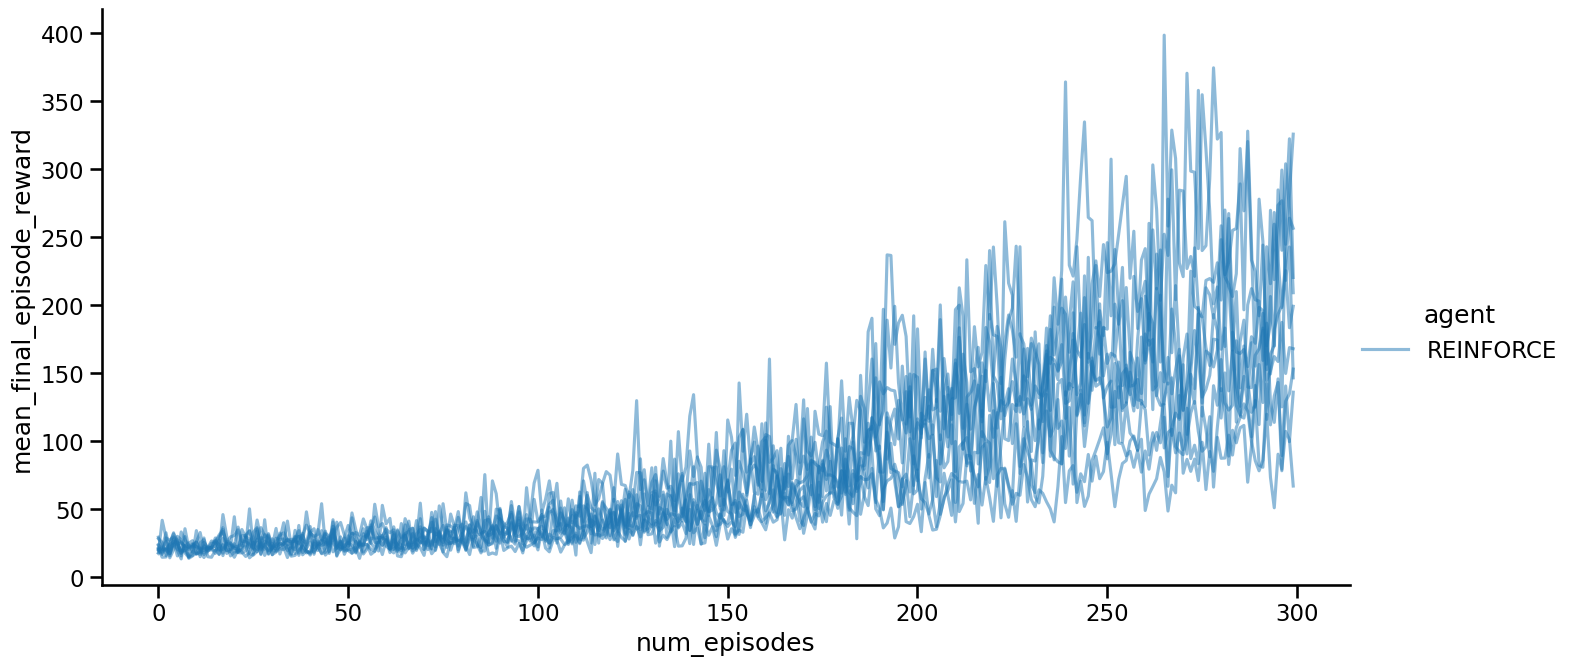

In [187]:
g = sns.relplot(
    x="num_episodes",
    y="mean_final_episode_reward",
    kind="line",
    hue="agent",
    estimator=None,
    units="training_index",
    data=reinforce_trains_result_df,
    height=7,
    aspect=2,
    alpha=0.5,
)
plt.savefig(PLOTS_DIR / "lab6_reinforce_cartpole_trains_result.png")

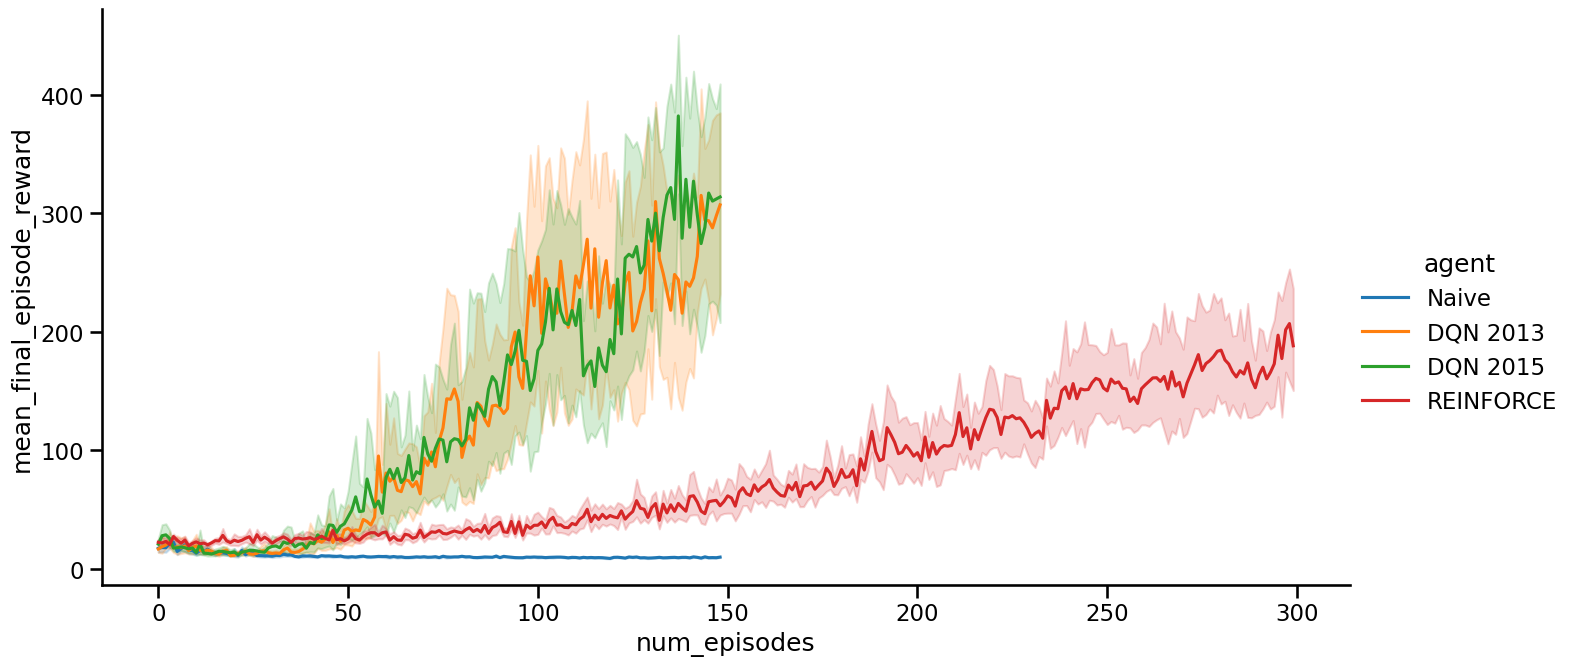

In [188]:
all_trains_result_df = pd.concat(
    [
        naive_trains_result_df,
        dqn1_trains_result_df,
        dqn2_trains_result_df,
        reinforce_trains_result_df,
    ]
)
g = sns.relplot(
    x="num_episodes",
    y="mean_final_episode_reward",
    kind="line",
    hue="agent",
    data=all_trains_result_df,
    height=7,
    aspect=2,
)
plt.savefig(PLOTS_DIR / "lab6_reinforce_cartpole_trains_result_agg.png")

#### Test final policy

In [180]:
VIDEO_PREFIX_EX5_REINFORCE_TRAINED = "lab6_ex5_reinforce_tained"

NUM_EPISODES = 3

file_path_list = [
    FIGS_DIR / f"{VIDEO_PREFIX_EX5_REINFORCE_TRAINED}-episode-{episode_index}.mp4"
    for episode_index in range(NUM_EPISODES)
]

for file_path in file_path_list:
    file_path.unlink(missing_ok=True)

env = gym.make("CartPole-v1", render_mode="rgb_array")
env = gym.wrappers.RecordVideo(
    env,
    video_folder=str(FIGS_DIR),
    name_prefix=VIDEO_PREFIX_EX5_REINFORCE_TRAINED,
    episode_trigger=lambda x: True,
)
env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=NUM_EPISODES)
test_q_network_agent(env, reinforce_policy_nn, num_episode=NUM_EPISODES)
# TODO...

print(f"Episode time taken: {env.time_queue}")
print(f"Episode total rewards: {env.return_queue}")
print(f"Episode lengths: {env.length_queue}")

env.close()

print("\nSelect the episode to play here 👇\n")

interact(video_selector, file_path=file_path_list)

Episode reward: 56.0
Episode reward: 43.0
Episode reward: 60.0
Episode time taken: deque([0.114166, 0.114448, 0.112641], maxlen=3)
Episode total rewards: deque([56.0, 43.0, 60.0], maxlen=3)
Episode lengths: deque([56, 43, 60], maxlen=3)

Select the episode to play here 👇



interactive(children=(Dropdown(description='file_path', options=(PosixPath('figs/outputs/lab6_ex5_reinforce_ta…

<function __main__.video_selector(file_path: List[pathlib.Path])>

**Task 5.9**: decrease the learning rate value (e.g. 0.001), increase the number of episodes per training and retrain the agent. What do you observe ?

Decreasing the learning rate improves the stability of the algorithm at the cost of a reduce growth of reward.

In [181]:
reinforce_trains_result_df

,num_episodes,mean_final_episode_reward,training_index,agent
0,0.0,24.0,0.0,REINFORCE
1,1.0,29.4,0.0,REINFORCE
2,2.0,16.2,0.0,REINFORCE
3,3.0,12.2,0.0,REINFORCE
4,4.0,11.0,0.0,REINFORCE
...,...,...,...,...
1495,145.0,44.2,9.0,REINFORCE
1496,146.0,57.4,9.0,REINFORCE
1497,147.0,47.8,9.0,REINFORCE
1498,148.0,51.6,9.0,REINFORCE


#### Score

In [182]:
score_ex5 = reinforce_trains_result_df[["num_episodes", "mean_final_episode_reward"]].groupby("num_episodes").mean().max()
score_ex5

mean_final_episode_reward    79.14
dtype: float64

## Bonus 2: Hyperparameters optimization with Optuna

Optuna is an open-source hyperparameter optimization framework designed to automate the process of searching for the best hyperparameters in machine learning models. It is highly efficient and flexible, supporting various optimization algorithms. Optuna works with Python-based machine learning libraries like PyTorch, TensorFlow, and Scikit-learn. Optuna’s core feature is its ability to perform dynamic search spaces and pruning, allowing faster convergence by terminating poorly performing trials early.
Optuna supports distributed optimization for large-scale tuning.

### Installation

```
pip install optuna
```

### Official documentation

- Optuna GitHub: [https://github.com/optuna/optuna](https://github.com/optuna/optuna)
- Optuna Documentation: [https://optuna.org](https://optuna.org)

### Example of usage with PyTorch

Here's an example of how to use Optuna to optimize the hyperparameters of a simple neural network with PyTorch.

In [183]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from torch.utils.data import DataLoader, TensorDataset

# Define the PyTorch model
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Objective function for Optuna
def objective(trial):
    # Hyperparameters to be tuned
    hidden_size = trial.suggest_int('hidden_size', 32, 128)
    lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)

    model = Net(input_size=28*28, hidden_size=hidden_size, output_size=10)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    # Dummy dataset
    X = torch.randn(100, 28*28)
    y = torch.randint(0, 10, (100,))
    train_loader = DataLoader(TensorDataset(X, y), batch_size=32)

    # Training loop
    for epoch in range(10):
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_x)
            loss = loss_fn(output, batch_y)
            loss.backward()
            optimizer.step()

    return loss.item()

# Optimize hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Show best hyperparameters
print(study.best_trial)

[I 2025-02-17 11:29:28,272] A new study created in memory with name: no-name-349ae161-0f45-4bd1-8b46-2e15bfc86f7b
/tmp/ipykernel_46232/3785706374.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)
[I 2025-02-17 11:29:28,332] Trial 0 finished with value: 4.202112904749811e-06 and parameters: {'hidden_size': 103, 'lr': 0.003096906416386337}. Best is trial 0 with value: 4.202112904749811e-06.
[I 2025-02-17 11:29:28,384] Trial 1 finished with value: 0.096406489610672 and parameters: {'hidden_size': 109, 'lr': 0.0004841254233451915}. Best is trial 0 with value: 4.202112904749811e-06.
[I 2025-02-17 11:29:28,440] Trial 2 finished with value: 0.6322430968284607 and parameters: {'hidden_size': 116, 'lr': 0.00016873434744609186}. Best is trial 0 with value: 4.202112904749811e-06.
[I 2025-

FrozenTrial(number=5, state=TrialState.COMPLETE, values=[2.0861622829215776e-07], datetime_start=datetime.datetime(2025, 2, 17, 11, 29, 28, 571453), datetime_complete=datetime.datetime(2025, 2, 17, 11, 29, 28, 617129), params={'hidden_size': 91, 'lr': 0.004849023841847426}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'hidden_size': IntDistribution(high=128, log=False, low=32, step=1), 'lr': FloatDistribution(high=0.01, log=True, low=0.0001, step=None)}, trial_id=5, value=None)


In [185]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
# import gym

def objective(trial):
    # Hyperparameters to optimize
    hidden_size = trial.suggest_int('hidden_size', 32, 256)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_int('batch_size', 16, 128)
    gamma = trial.suggest_float('gamma', 0.9, 0.99)

    # Initialize environment and model
    # env = gym.make('CartPole-v1')
    n_observations = env.observation_space.shape[0]
    n_actions = env.action_space.n

    model = ImprovedPolicyNetwork(n_observations, n_actions, hidden_size, dropout_rate)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training parameters
    num_episodes = 200
    max_steps = 500

    # Training loop
    total_rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        episode_rewards = []
        for step in range(max_steps):
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            action_probs = model(state_tensor)
            action = torch.multinomial(action_probs, 1).item()

            next_state, reward, done, _ = env.step(action)
            episode_rewards.append(reward)

            if done:
                break
            state = next_state

        # Calculate discounted rewards
        discounted_rewards = []
        cumulative_reward = 0
        for r in reversed(episode_rewards):
            cumulative_reward = r + gamma * cumulative_reward
            discounted_rewards.insert(0, cumulative_reward)

        # Normalize discounted rewards
        discounted_rewards = torch.FloatTensor(discounted_rewards)
        discounted_rewards = (discounted_rewards - discounted_rewards.mean()) / (discounted_rewards.std() + 1e-9)

        # Update policy
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        action_probs = model(state_tensor)
        log_probs = torch.log(action_probs.gather(1, torch.LongTensor([action]).unsqueeze(0)))
        loss = -log_probs * discounted_rewards

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_rewards.append(sum(episode_rewards))

    # Return the average reward over the last 10 episodes
    avg_reward = sum(total_rewards[-10:]) / 10
    return avg_reward

# Step 3: Run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Step 4: Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

[I 2025-02-17 11:30:07,019] A new study created in memory with name: no-name-8cf464c9-2dcb-4e15-a07d-d99da56e2ecf
[W 2025-02-17 11:30:07,055] Trial 0 failed with parameters: {'hidden_size': 191, 'dropout_rate': 0.44270682299532427, 'learning_rate': 0.0018203354648938254, 'batch_size': 75, 'gamma': 0.9438273847387747} because of the following error: ValueError('expected sequence of length 4 at dim 1 (got 0)').
Traceback (most recent call last):
  File "/home/trofino/.local/lib/python3.10/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_46232/778329518.py", line 33, in objective
    state_tensor = torch.FloatTensor(state).unsqueeze(0)
ValueError: expected sequence of length 4 at dim 1 (got 0)
[W 2025-02-17 11:30:07,056] Trial 0 failed with value None.


ValueError: expected sequence of length 4 at dim 1 (got 0)

This example creates a basic neural network and tunes the `hidden_size` and learning rate (`lr`) using Optuna.